In [30]:
from pathlib import Path
import base64
import os
import re
import time
import json
import pandas as pd
import litellm

# Load .env (force override so notebook doesn't keep an old key)
try:
    from dotenv import load_dotenv, find_dotenv
    load_dotenv(find_dotenv(), override=True)
except Exception:
    pass

# Ensure litellm uses the key from env
litellm.api_key = os.getenv('OPENAI_API_KEY')

In [31]:
canva_samples = Path('../datasets/canva/')

# Create a dataframe of all the files in the canva samples directory
canva_samples_df = pd.DataFrame(list(canva_samples.glob('**/*')), columns=['path'])

# Add a column for the filename
canva_samples_df['filename'] = canva_samples_df['path'].apply(lambda x: x.name)

In [38]:
# For each webp, pass it to the openai API with litellm to desconstruct into the following spec
system_prompt = '''
You are a helpful graphic design assistant.
You take a graphic design and return a spec that can be used to reconstruct the image.

Your output should be a json object with the following fields:

{
    background_color: #ffffff,
    has_background_image: true,
    background_image_description: '<A description of the background image>',

    nodes: [
        {
            type: 'text',
            text: 'Hello, world!',
            x: 210,
            y: 175,
            width: 240,
            height: 40,
            rotation: 0, // degrees

            // CSS Properties
            font-family: 'Arial',
            font-size: 12,
            color: #000000,
            text-align: 'left',
            font-weight: 'normal',
            font-style: 'normal',
            text-decoration: 'none',
            text-transform: 'uppercase', 
        },
        {
            type: 'image'
            asset_description: '<A description of the image>'
            x: 100,
            y: 100,
            width: 460,
            height: 320,
        },
        ...
    ]
}

Every node should have an x, y, width, height, and type.

'''



16:23:03 - LiteLLM:DEBUG: utils.py:366 - 

16:23:03 - LiteLLM:DEBUG: utils.py:366 - Request to litellm:
16:23:03 - LiteLLM:DEBUG: utils.py:366 - litellm.completion(model='gpt-4o-mini', messages=[{'role': 'system', 'content': "\nYou are a helpful graphic design assistant.\nYou take a graphic design and return a spec that can be used to reconstruct the image.\n\nYour output should be a json object with the following fields:\n\n{\n    background_color: #ffffff,\n    has_background_image: true,\n    background_image_description: '<A description of the background image>',\n\n    nodes: [\n        {\n            type: 'text',\n            text: 'Hello, world!',\n            x: 210,\n            y: 175,\n            width: 240,\n            height: 40,\n\n            // CSS Properties\n            font-family: 'Arial',\n            font-size: 12,\n            color: #000000,\n            text-align: 'left',\n            font-weight: 'normal',\n            font-style: 'normal',\n            te
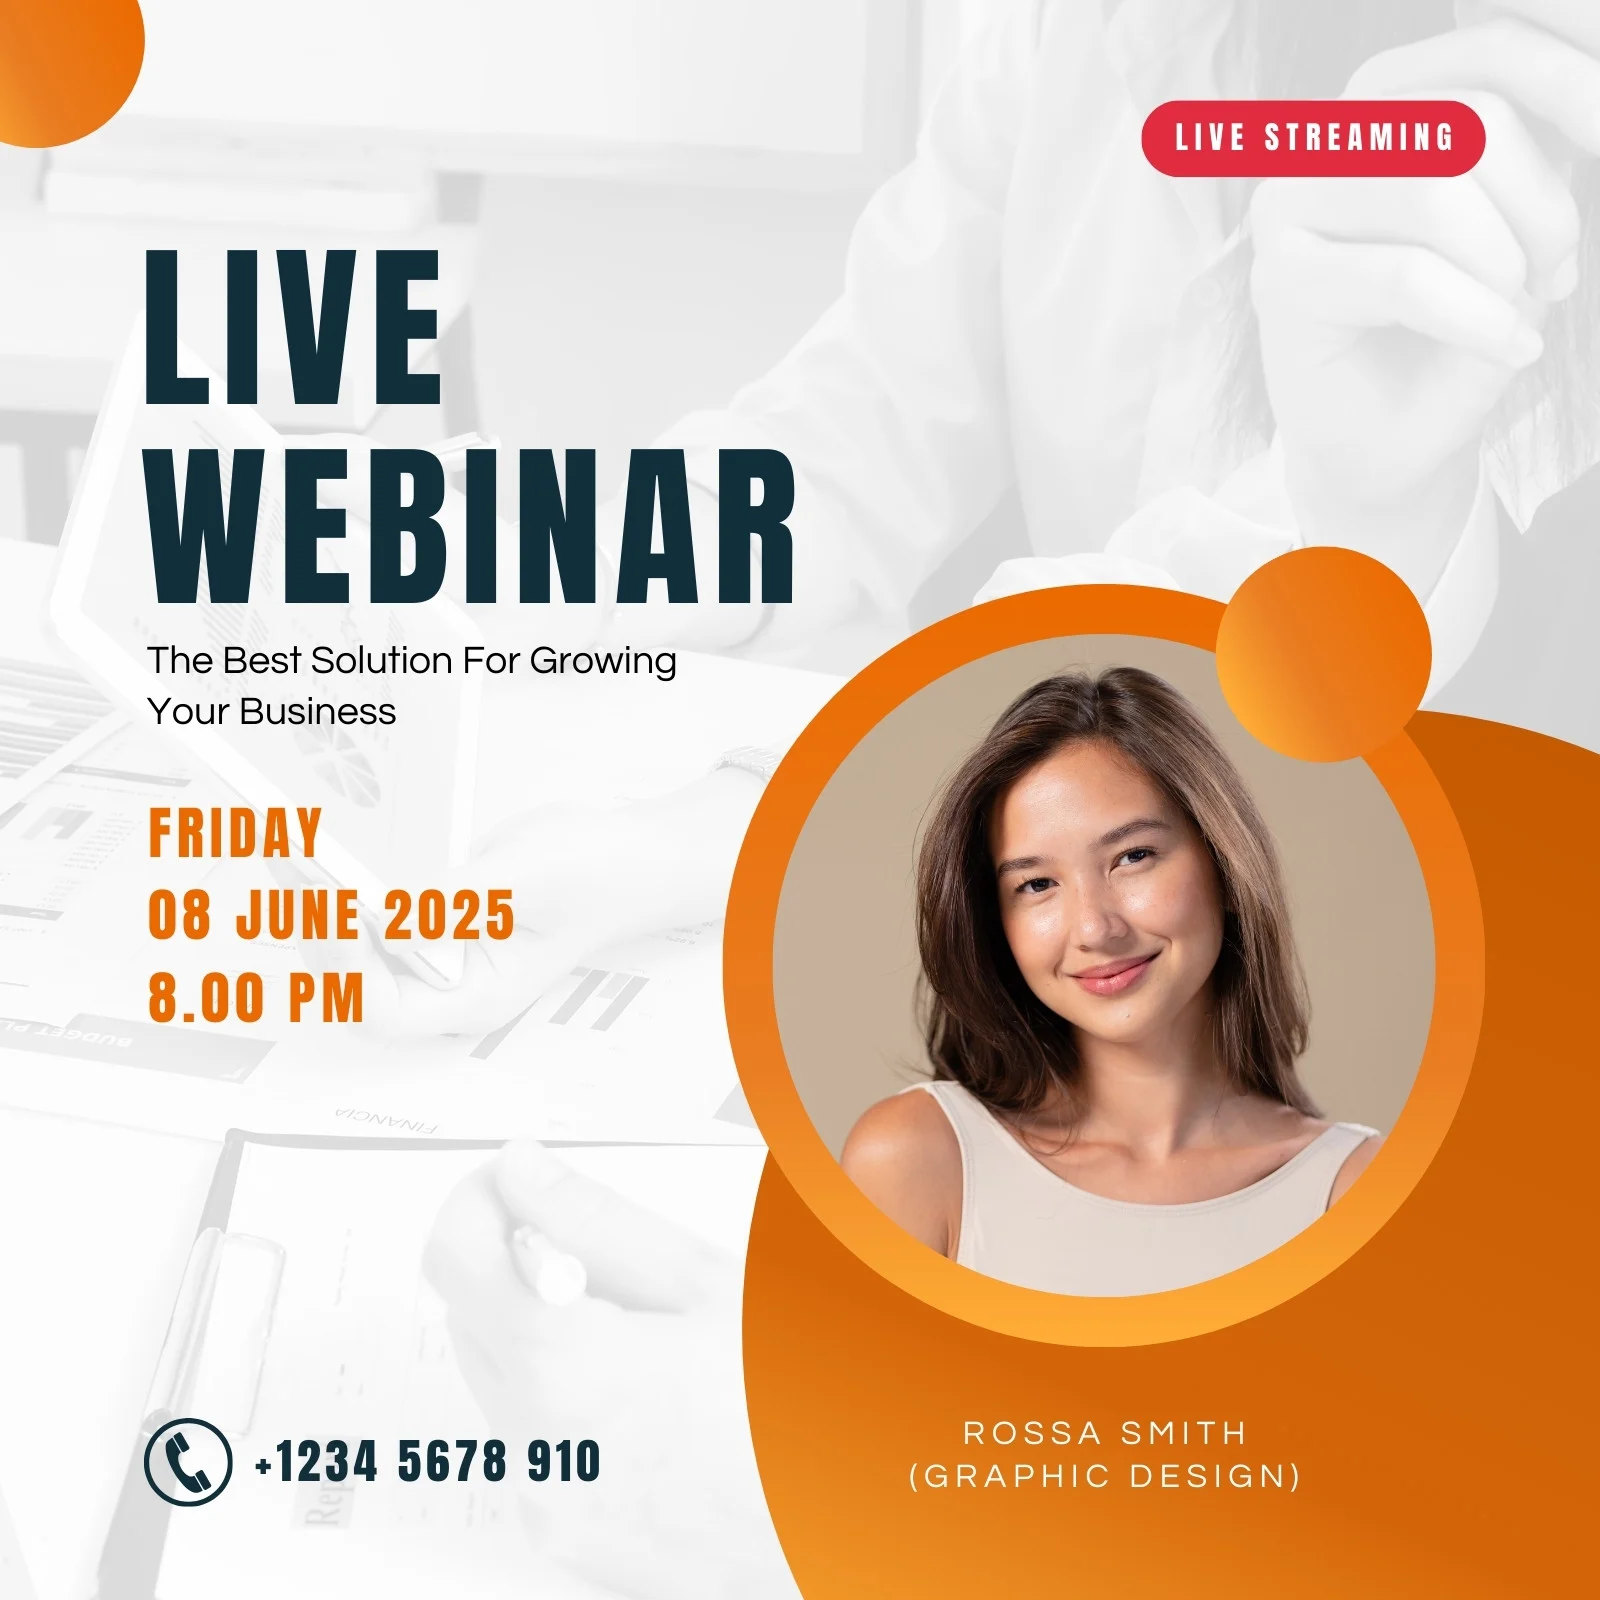
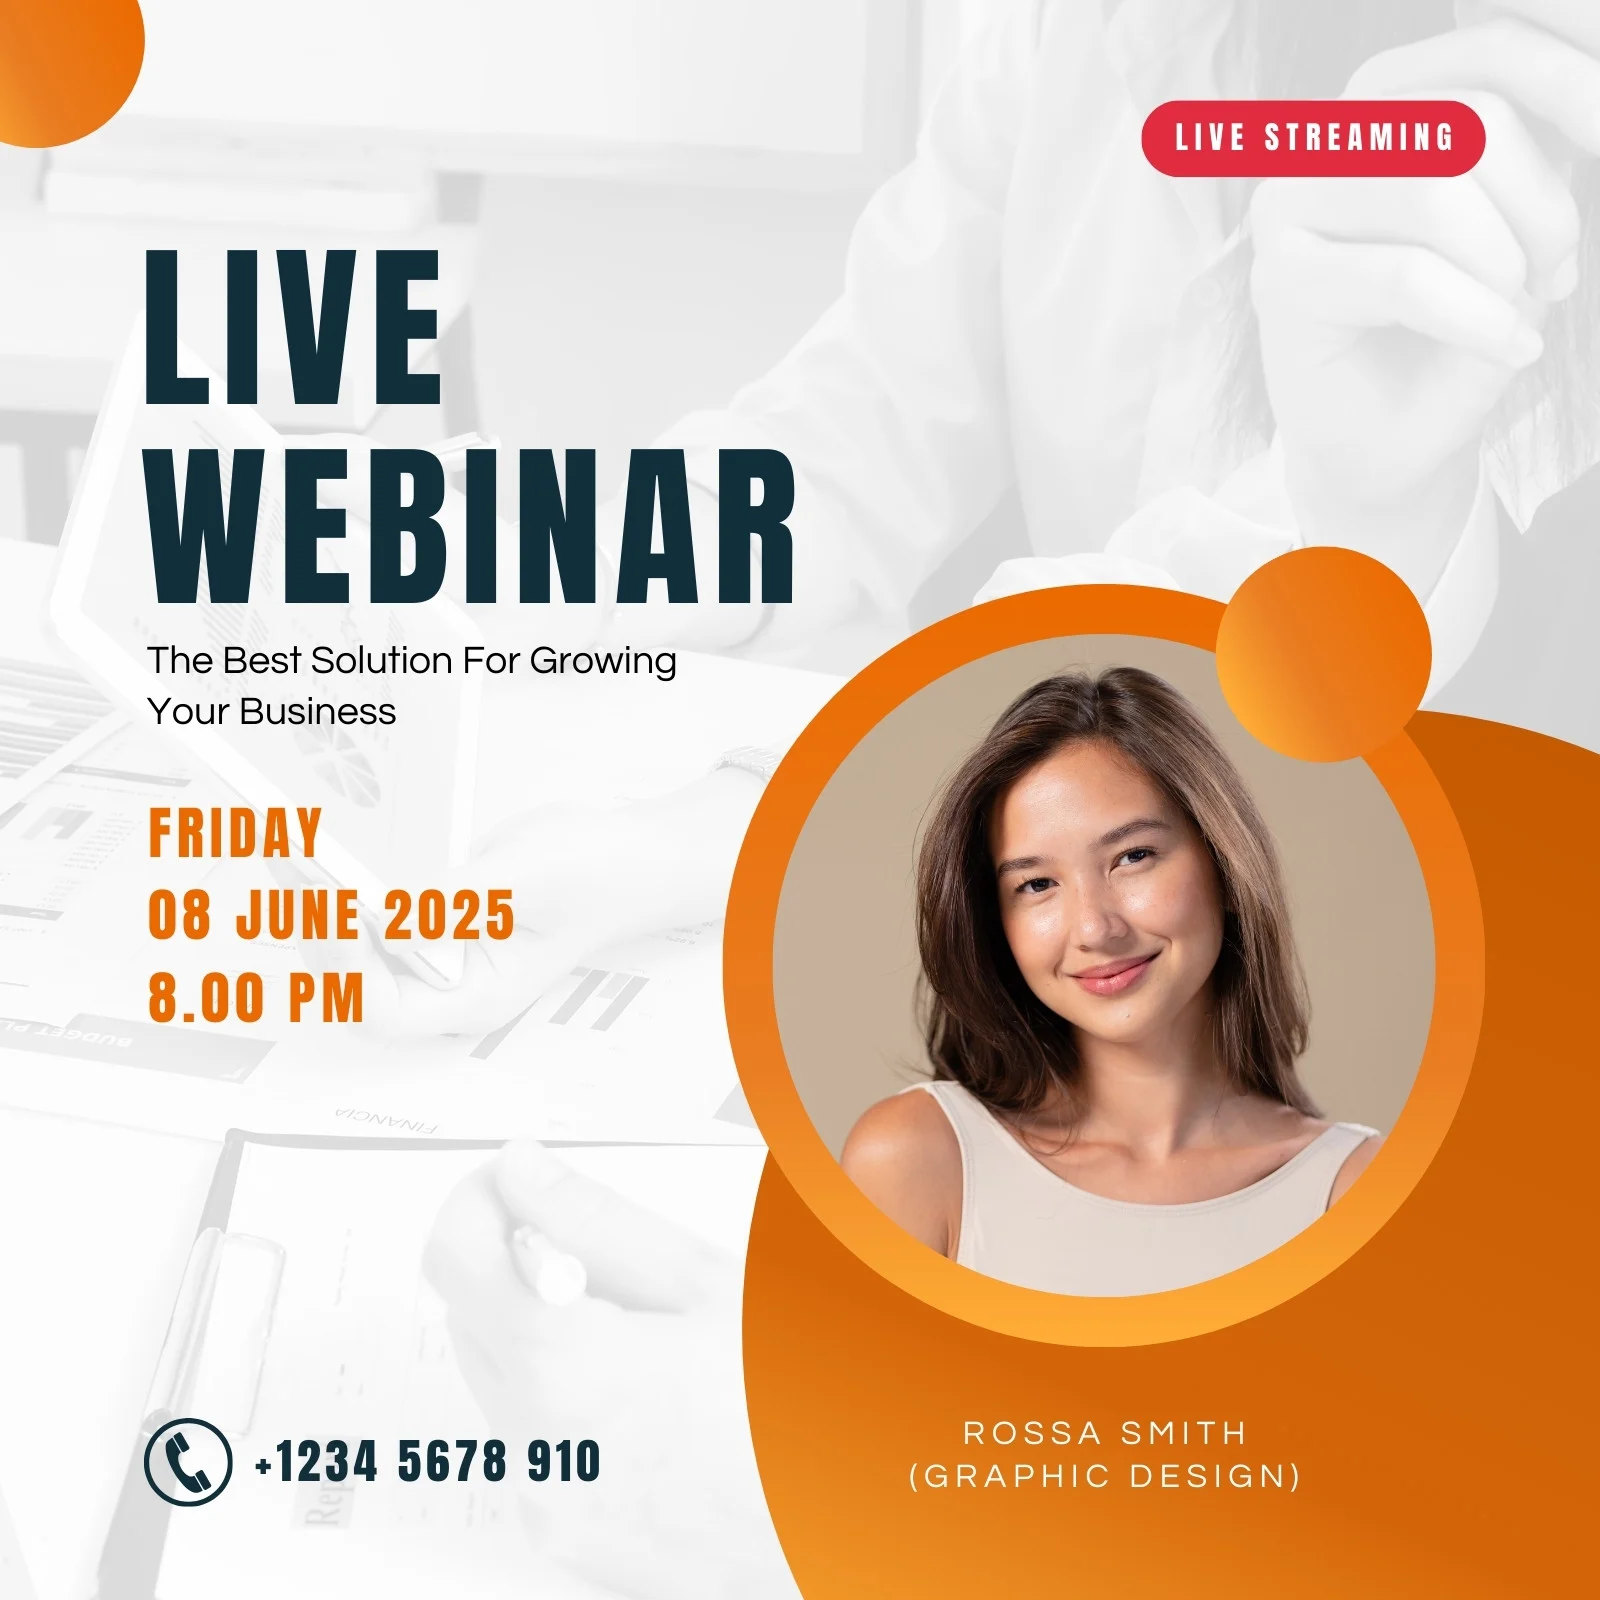
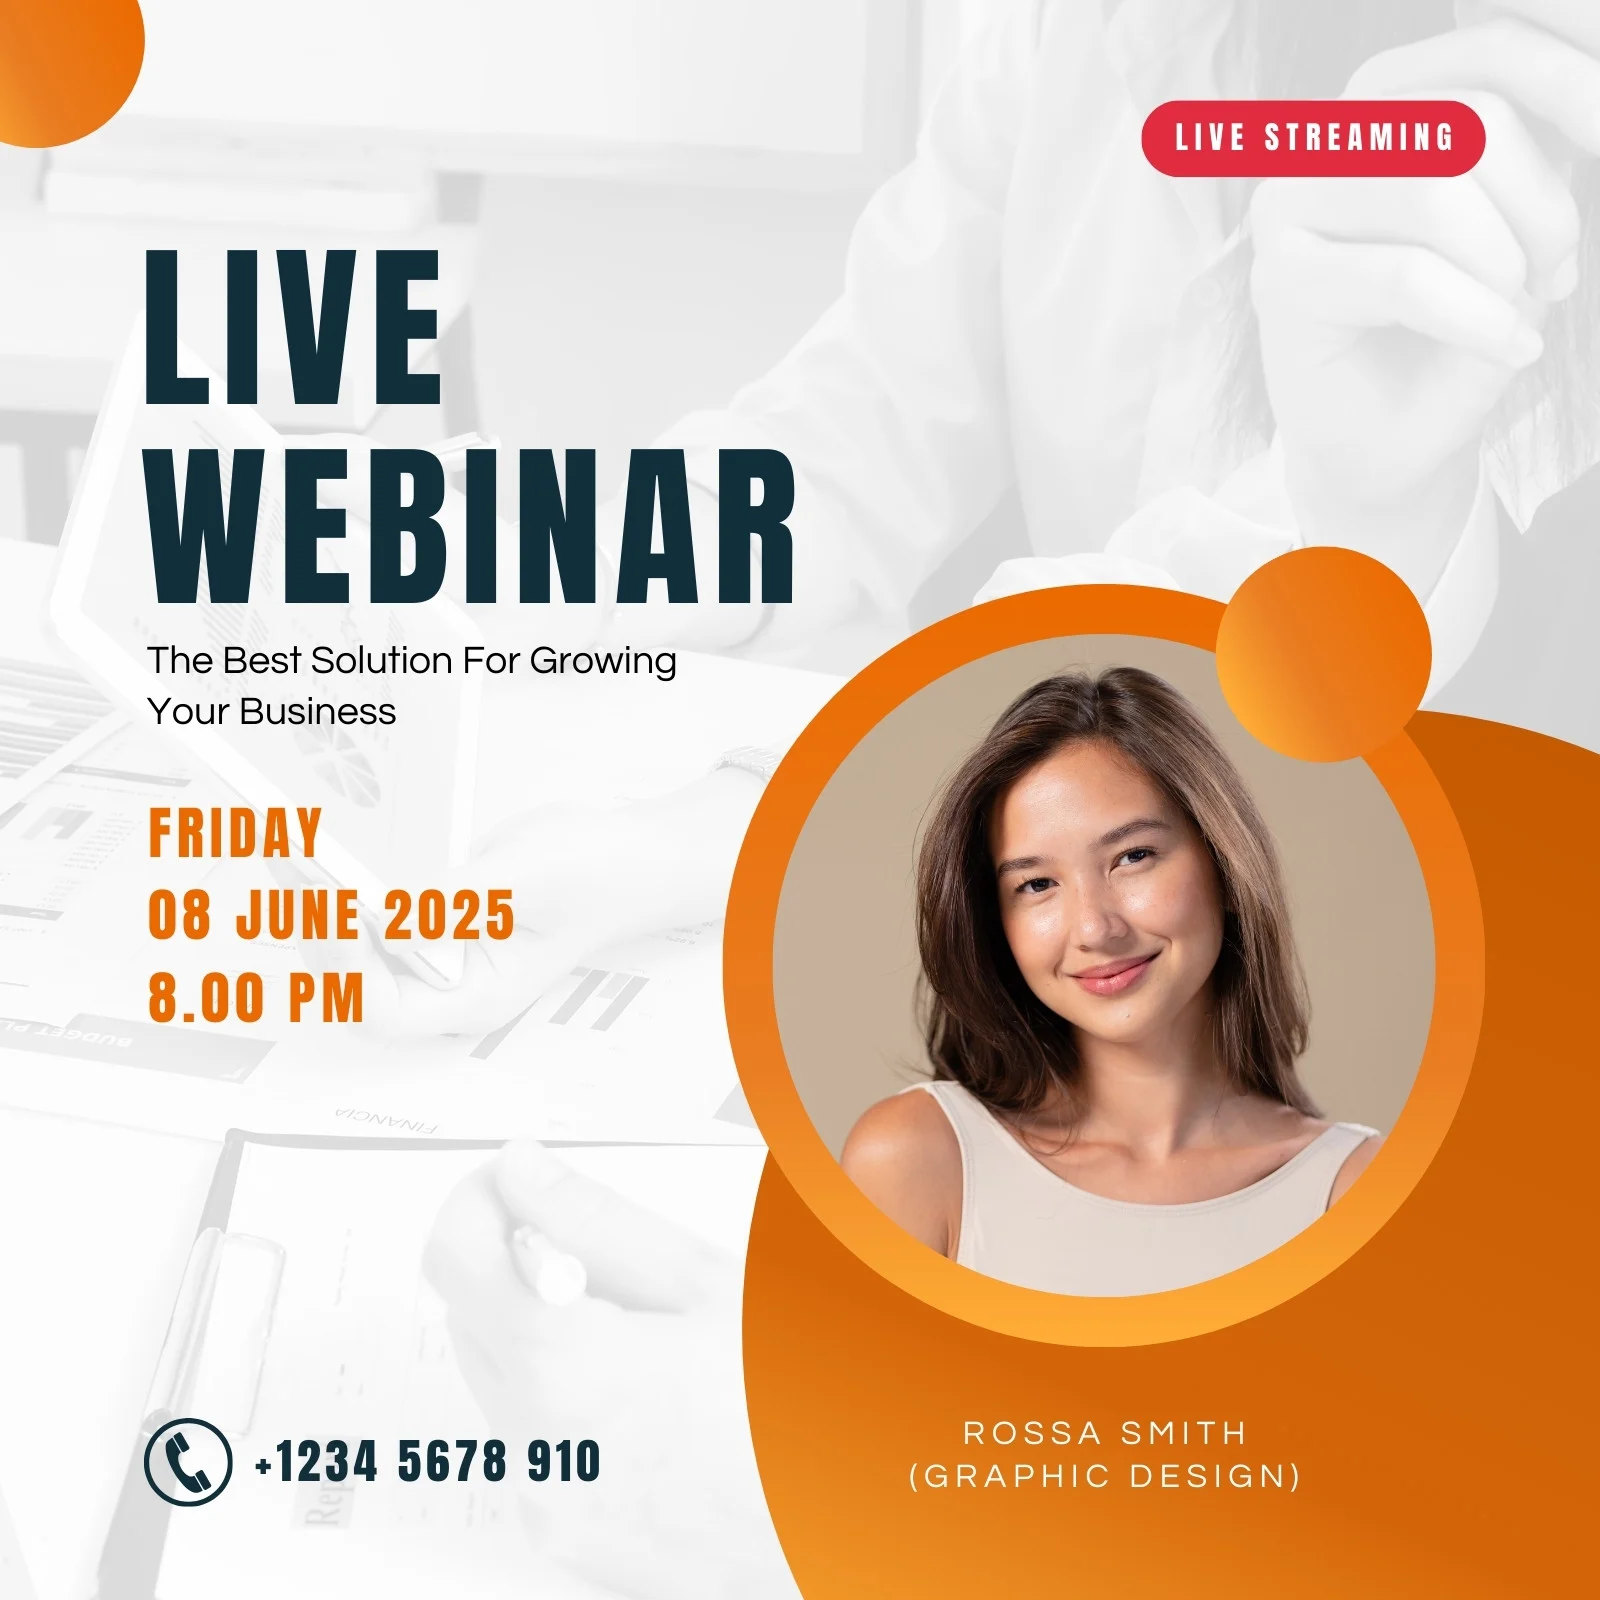

Found 7 image files


16:23:20 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStVRKhXUJ9pEYbSCIUZ6rZ6XGrU8", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#ffffff\",\n    \"has_background_image\": true,\n    \"background_image_description\": \"A blurred office background with documents and a person's hand holding a pen.\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"LIVE WEBINAR\",\n            \"x\": 50,\n            \"y\": 50,\n            \"width\": 300,\n            \"height\": 50,\n            \"font-family\": \"Arial\",\n            \"font-size\": 36,\n            \"color\": \"#000000\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"bold\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"uppercase\"\n        },\n        {\n            \"type\": \"text\",\n   
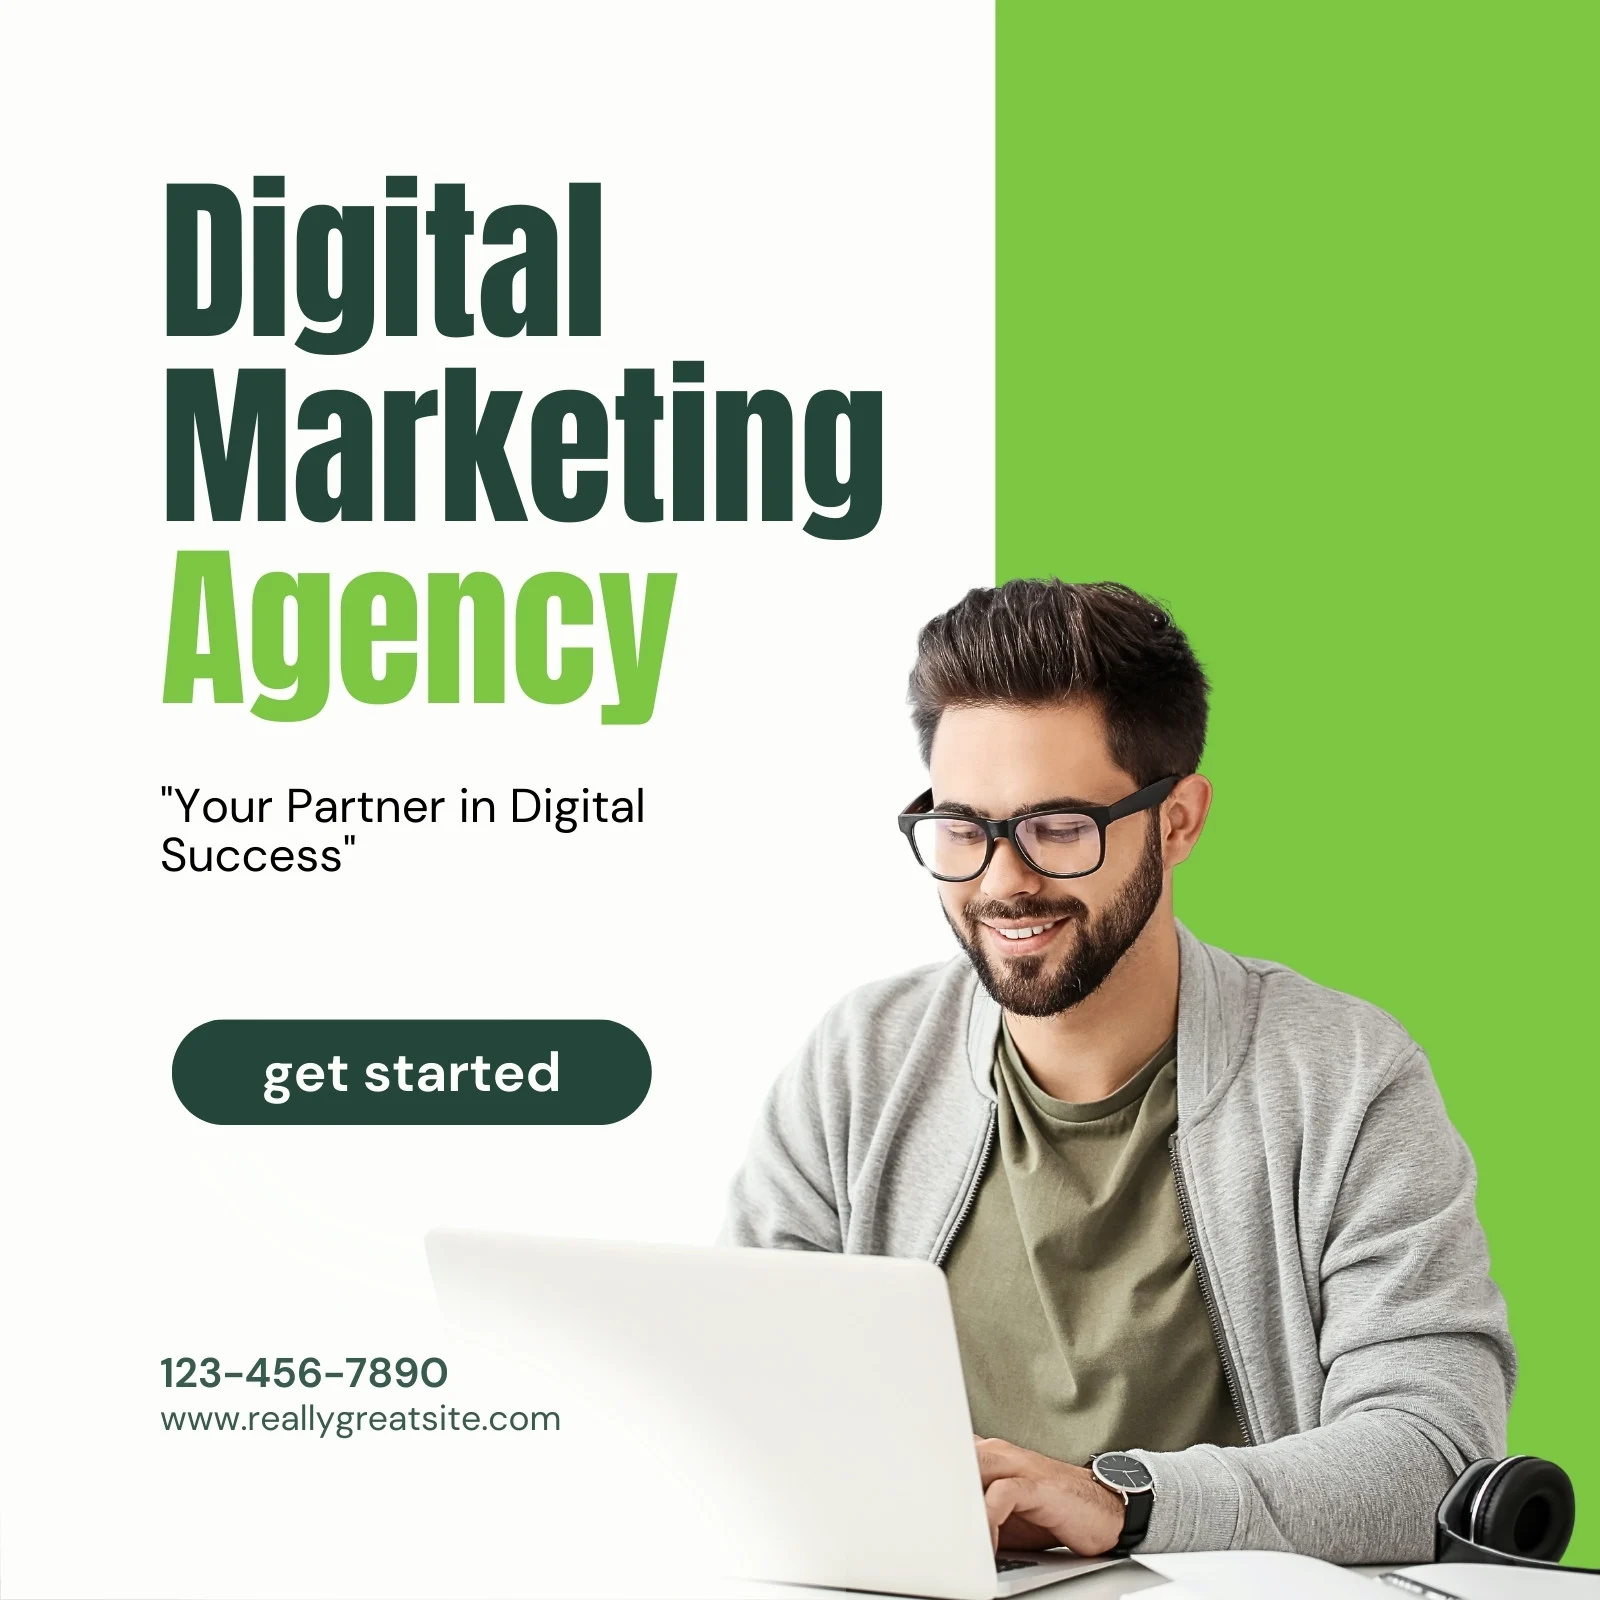
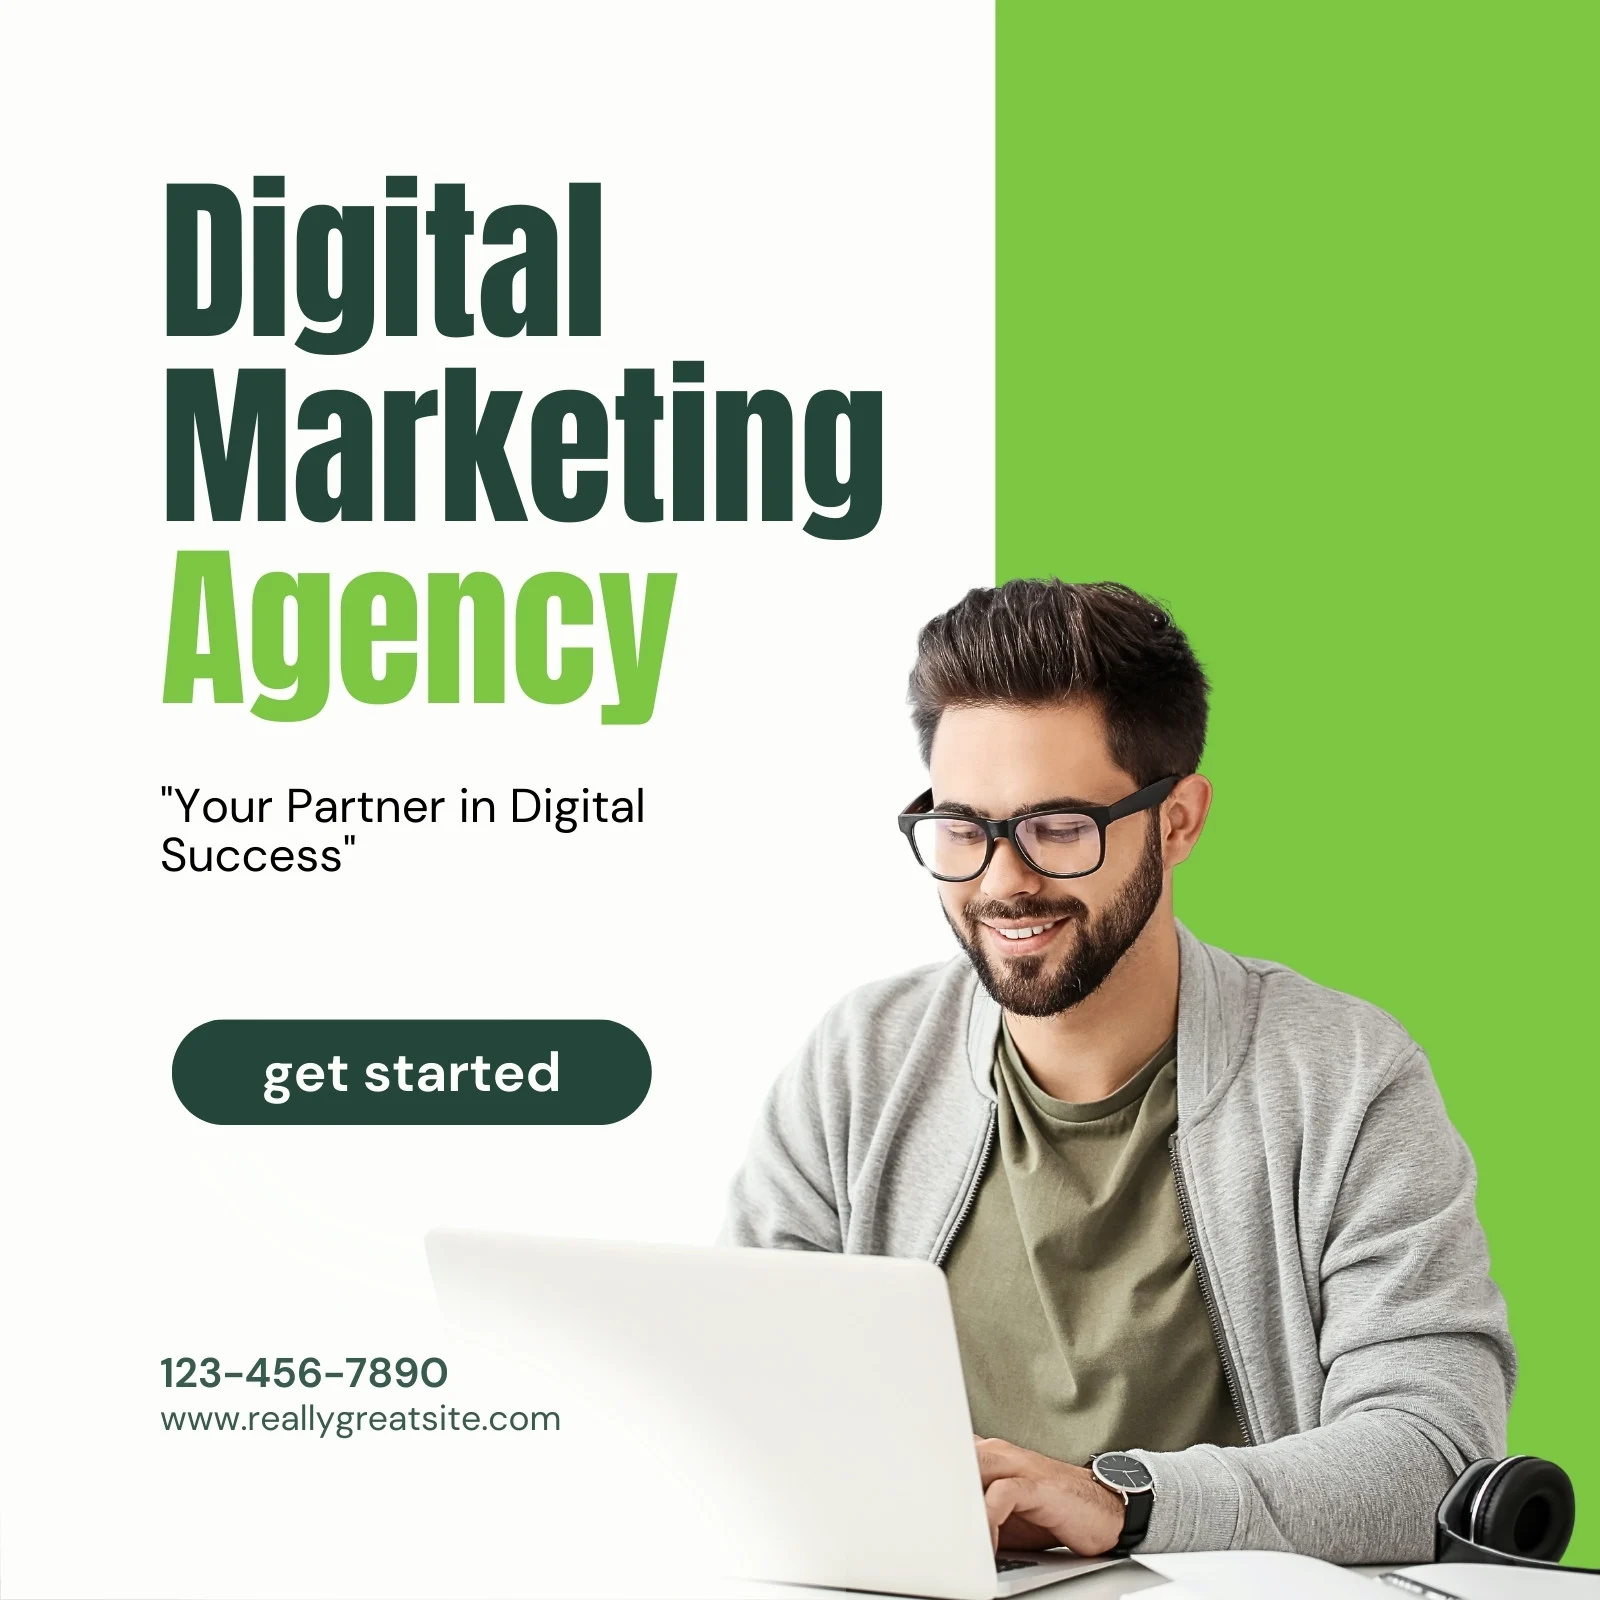
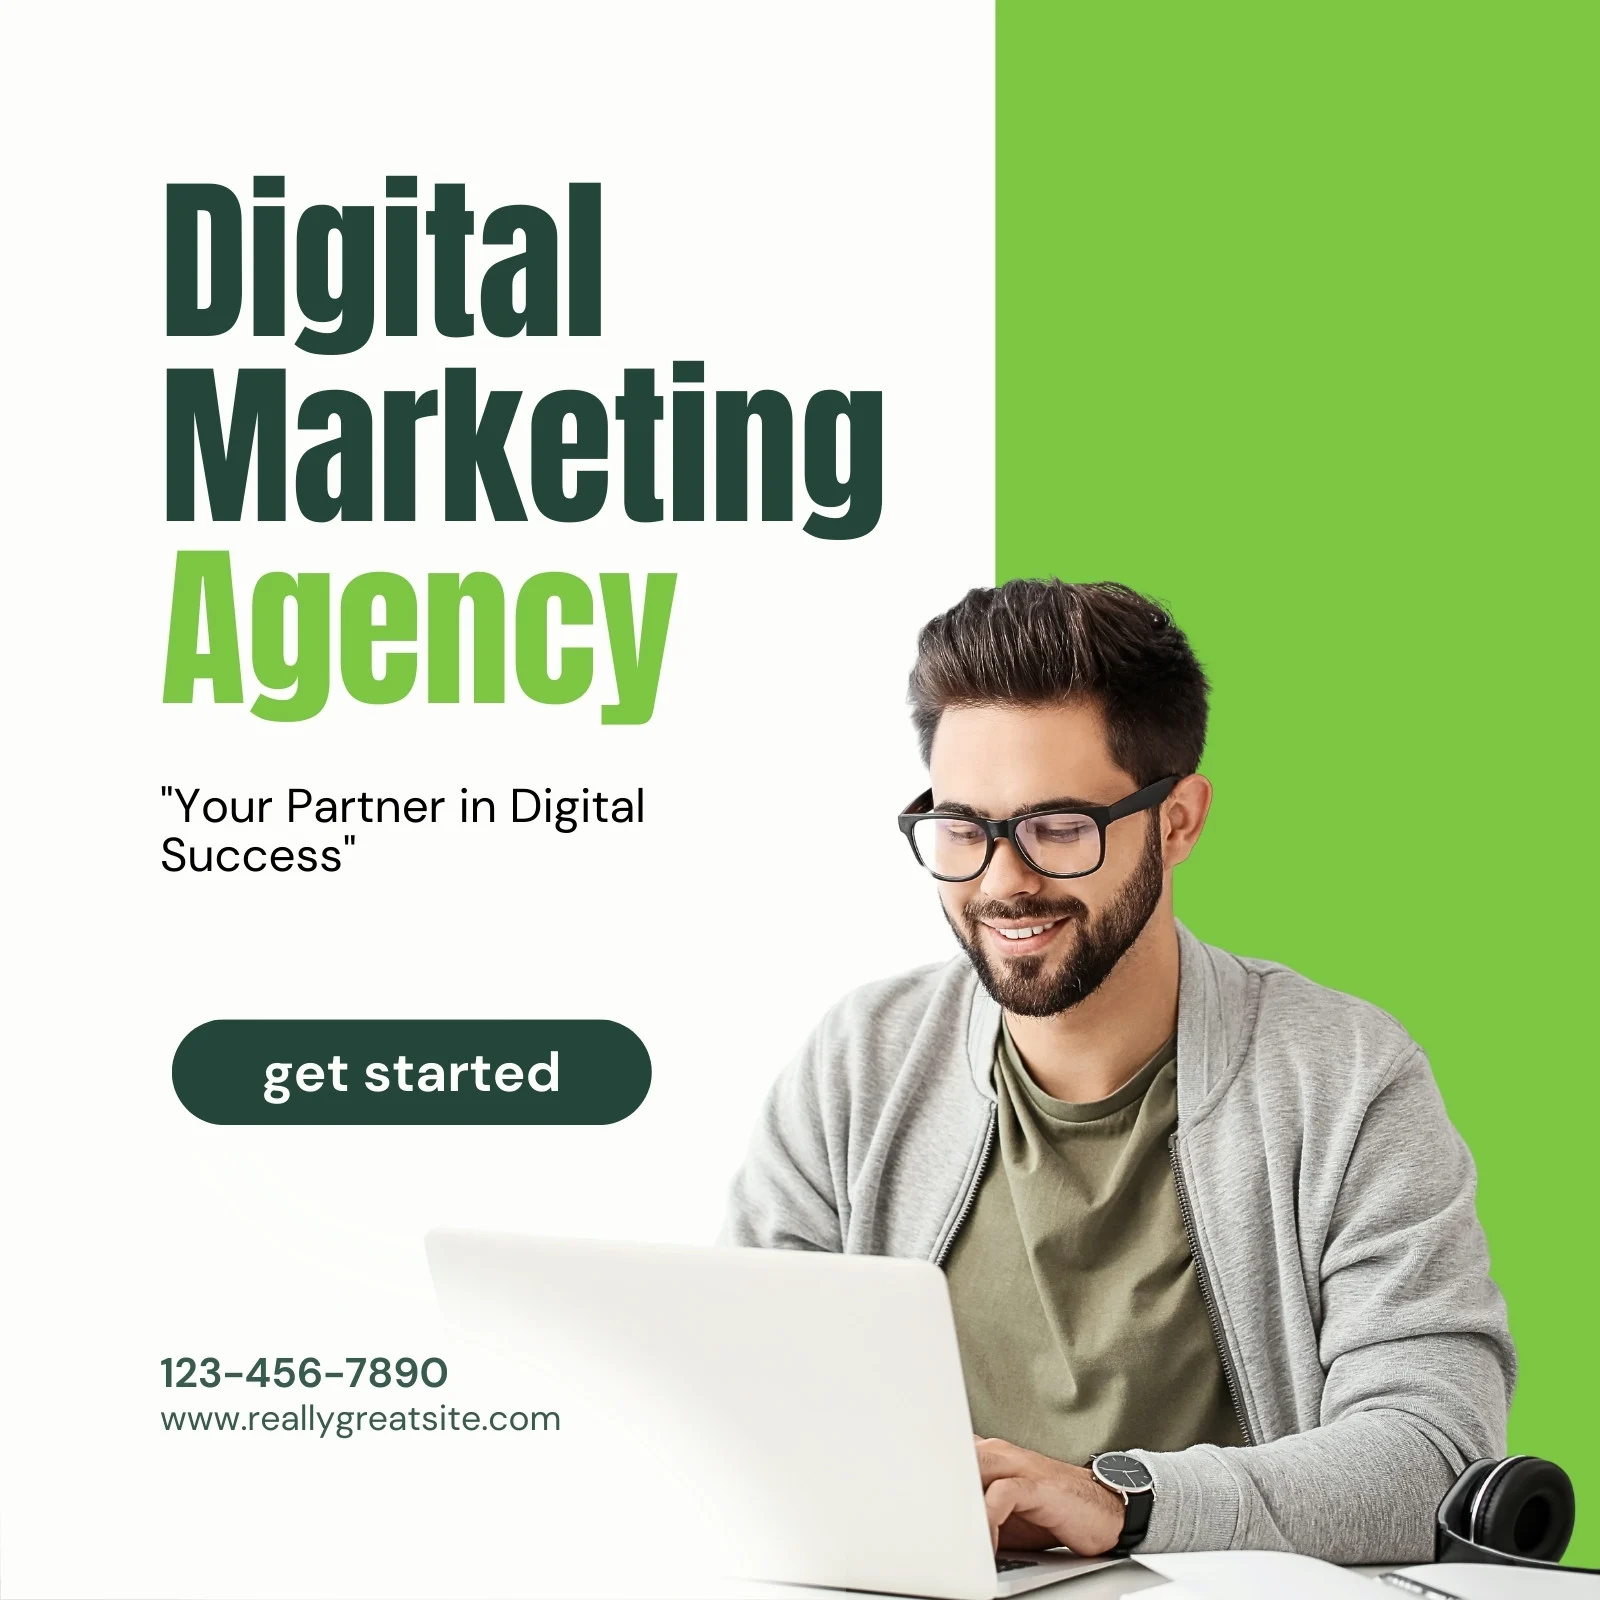

[1/7] Wrote 1600w-K18O8e4K488/spec.json


16:23:29 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStVgZJxRS7WRNPzlSk0YRlMBxGzb", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#ffffff\",\n    \"has_background_image\": false,\n    \"background_image_description\": \"\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"Digital Marketing Agency\",\n            \"x\": 50,\n            \"y\": 50,\n            \"width\": 300,\n            \"height\": 40,\n            \"font-family\": \"Arial\",\n            \"font-size\": 24,\n            \"color\": \"#000000\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"bold\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"none\"\n        },\n        {\n            \"type\": \"text\",\n            \"text\": \"\\\"Your Partner in Digital Success\\\"\",\n    
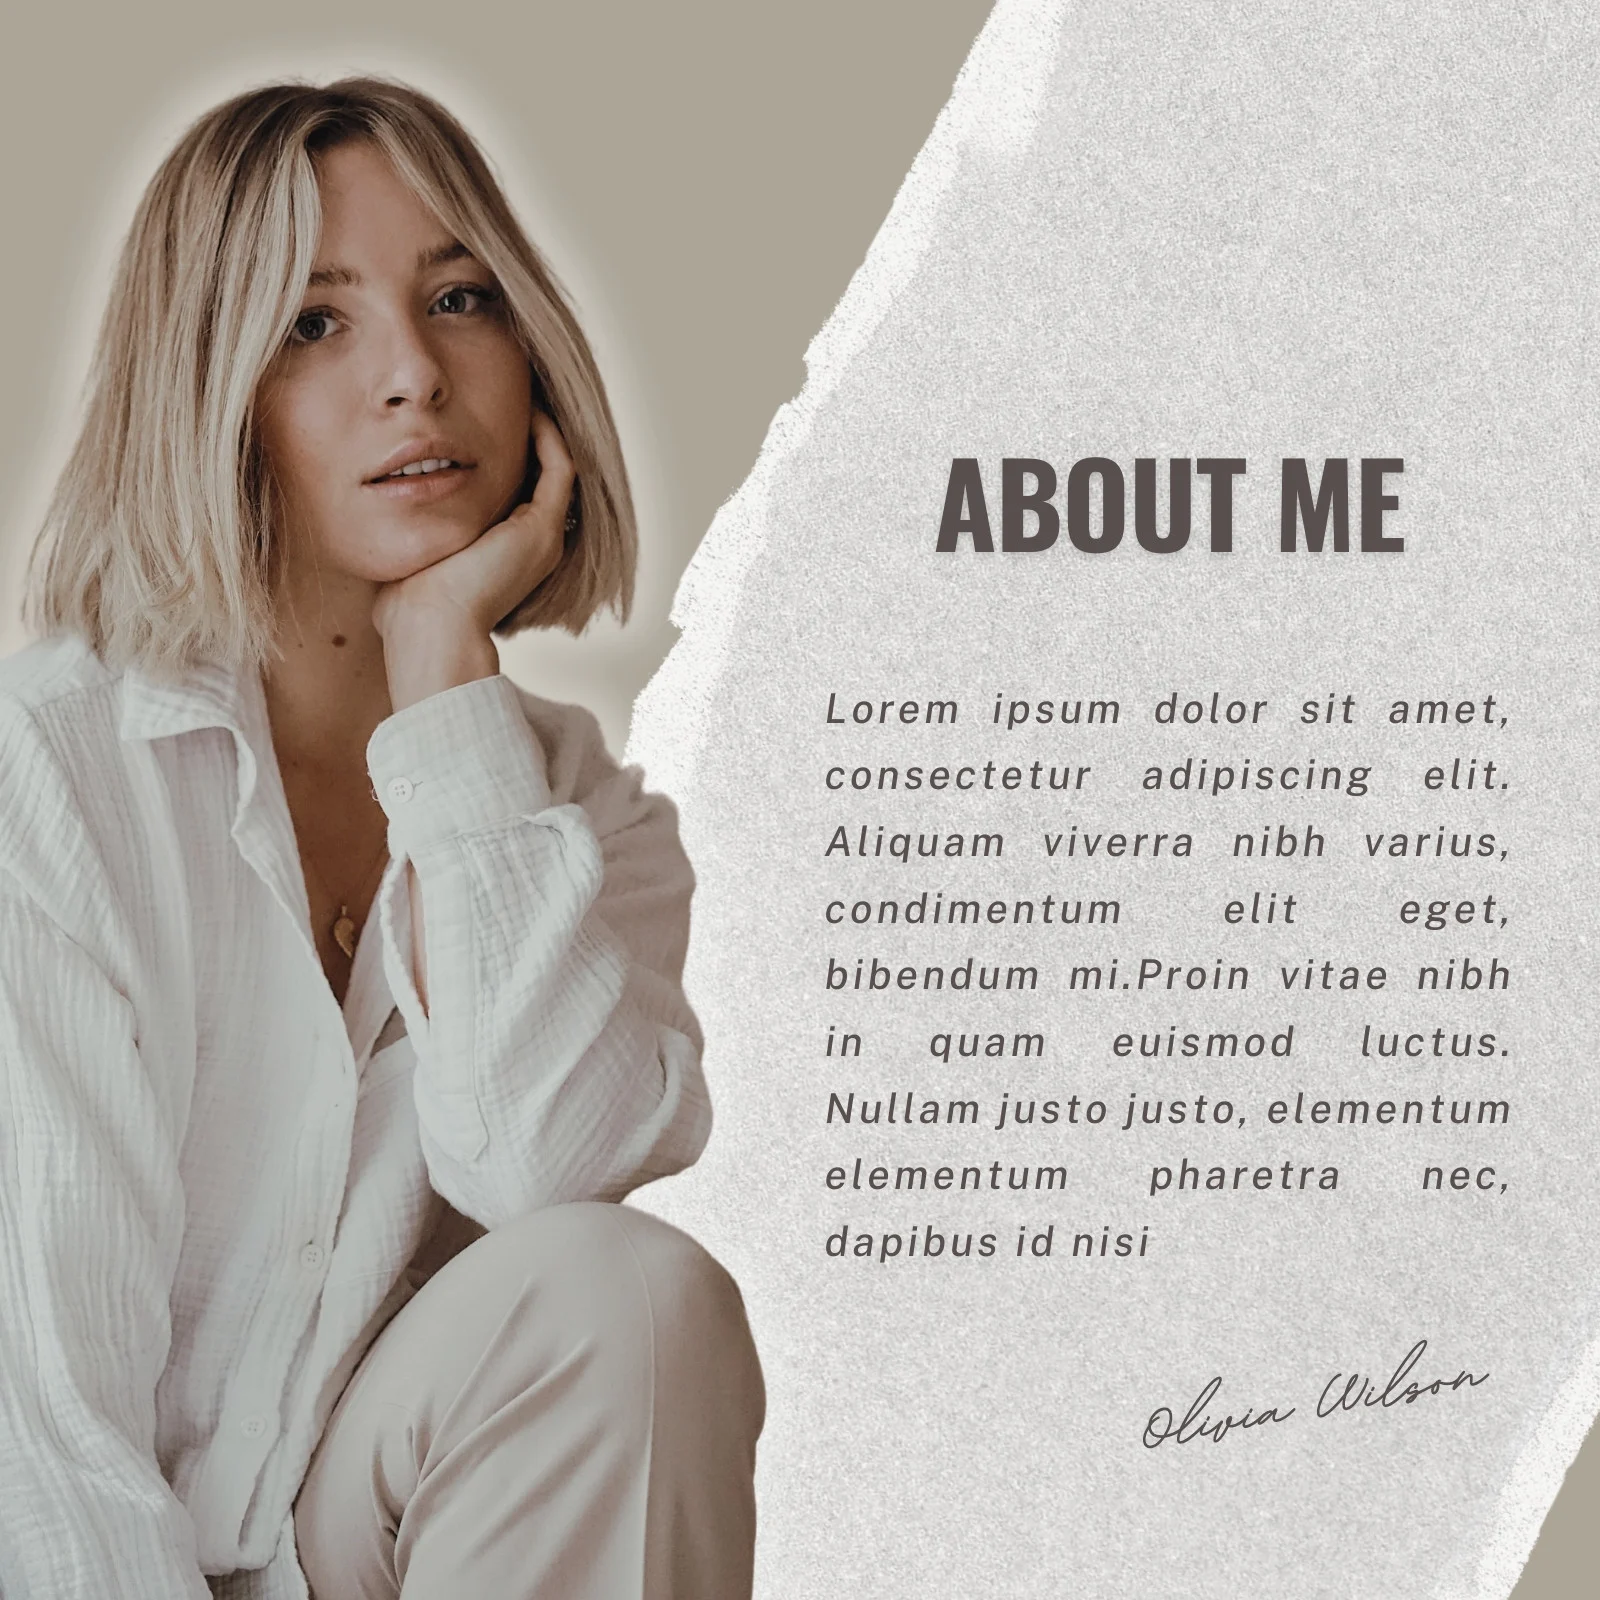
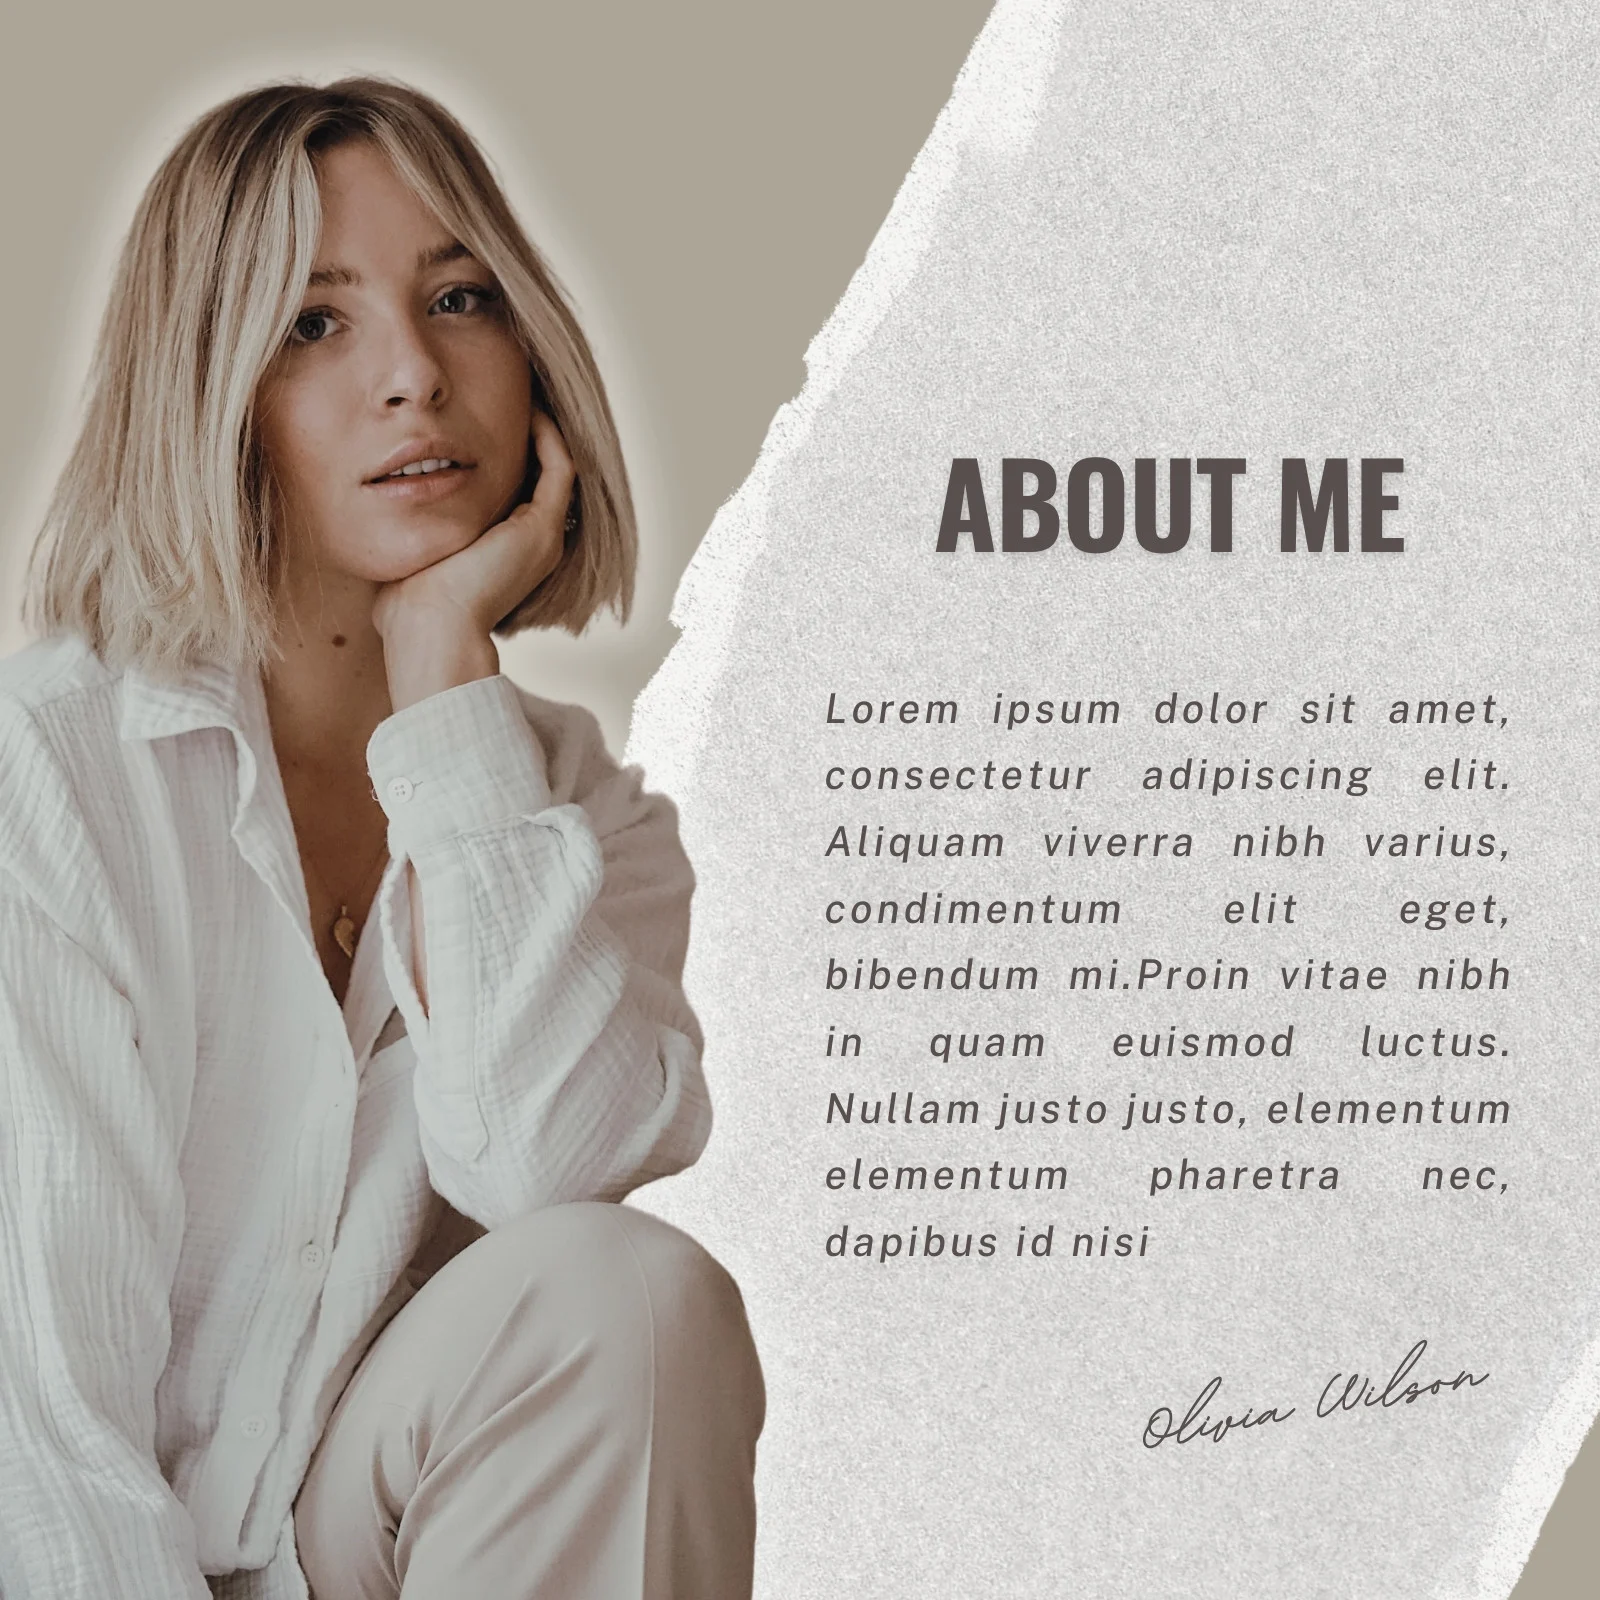
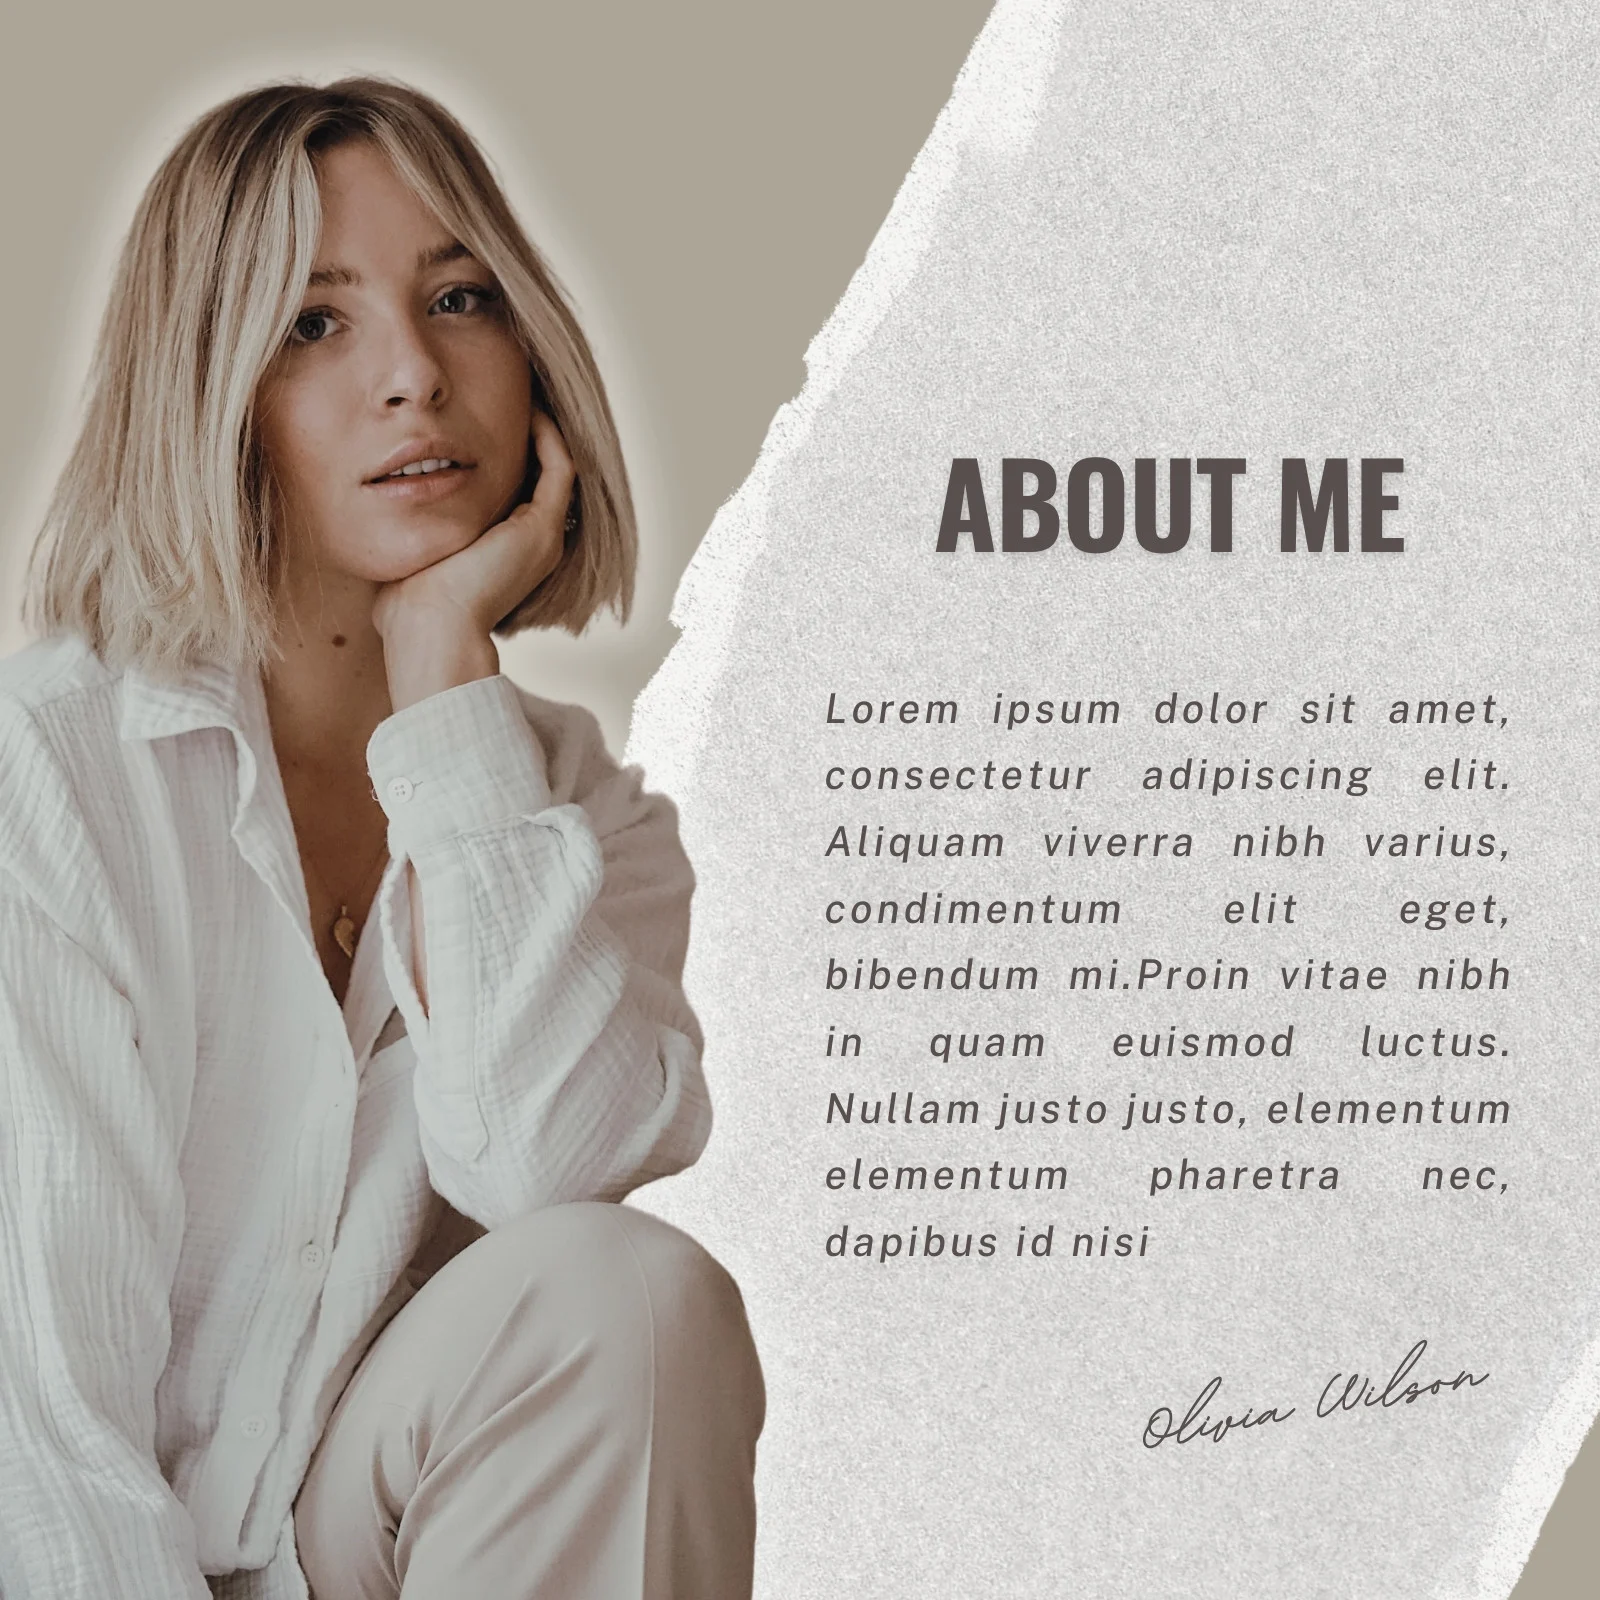

[2/7] Wrote 1600w-CxALar1xspQ/spec.json


16:23:37 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStVqwm0Yy9wNrlB7PgmfFnoPRpze", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#e0d8d0\",\n    \"has_background_image\": true,\n    \"background_image_description\": \"A soft beige background with a textured, light gray area on the right side containing text.\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"ABOUT ME\",\n            \"x\": 210,\n            \"y\": 50,\n            \"width\": 200,\n            \"height\": 40,\n            \"font-family\": \"Arial\",\n            \"font-size\": 24,\n            \"color\": \"#4b3d3d\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"bold\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"uppercase\"\n        },\n        {\n            \"type\": \"t
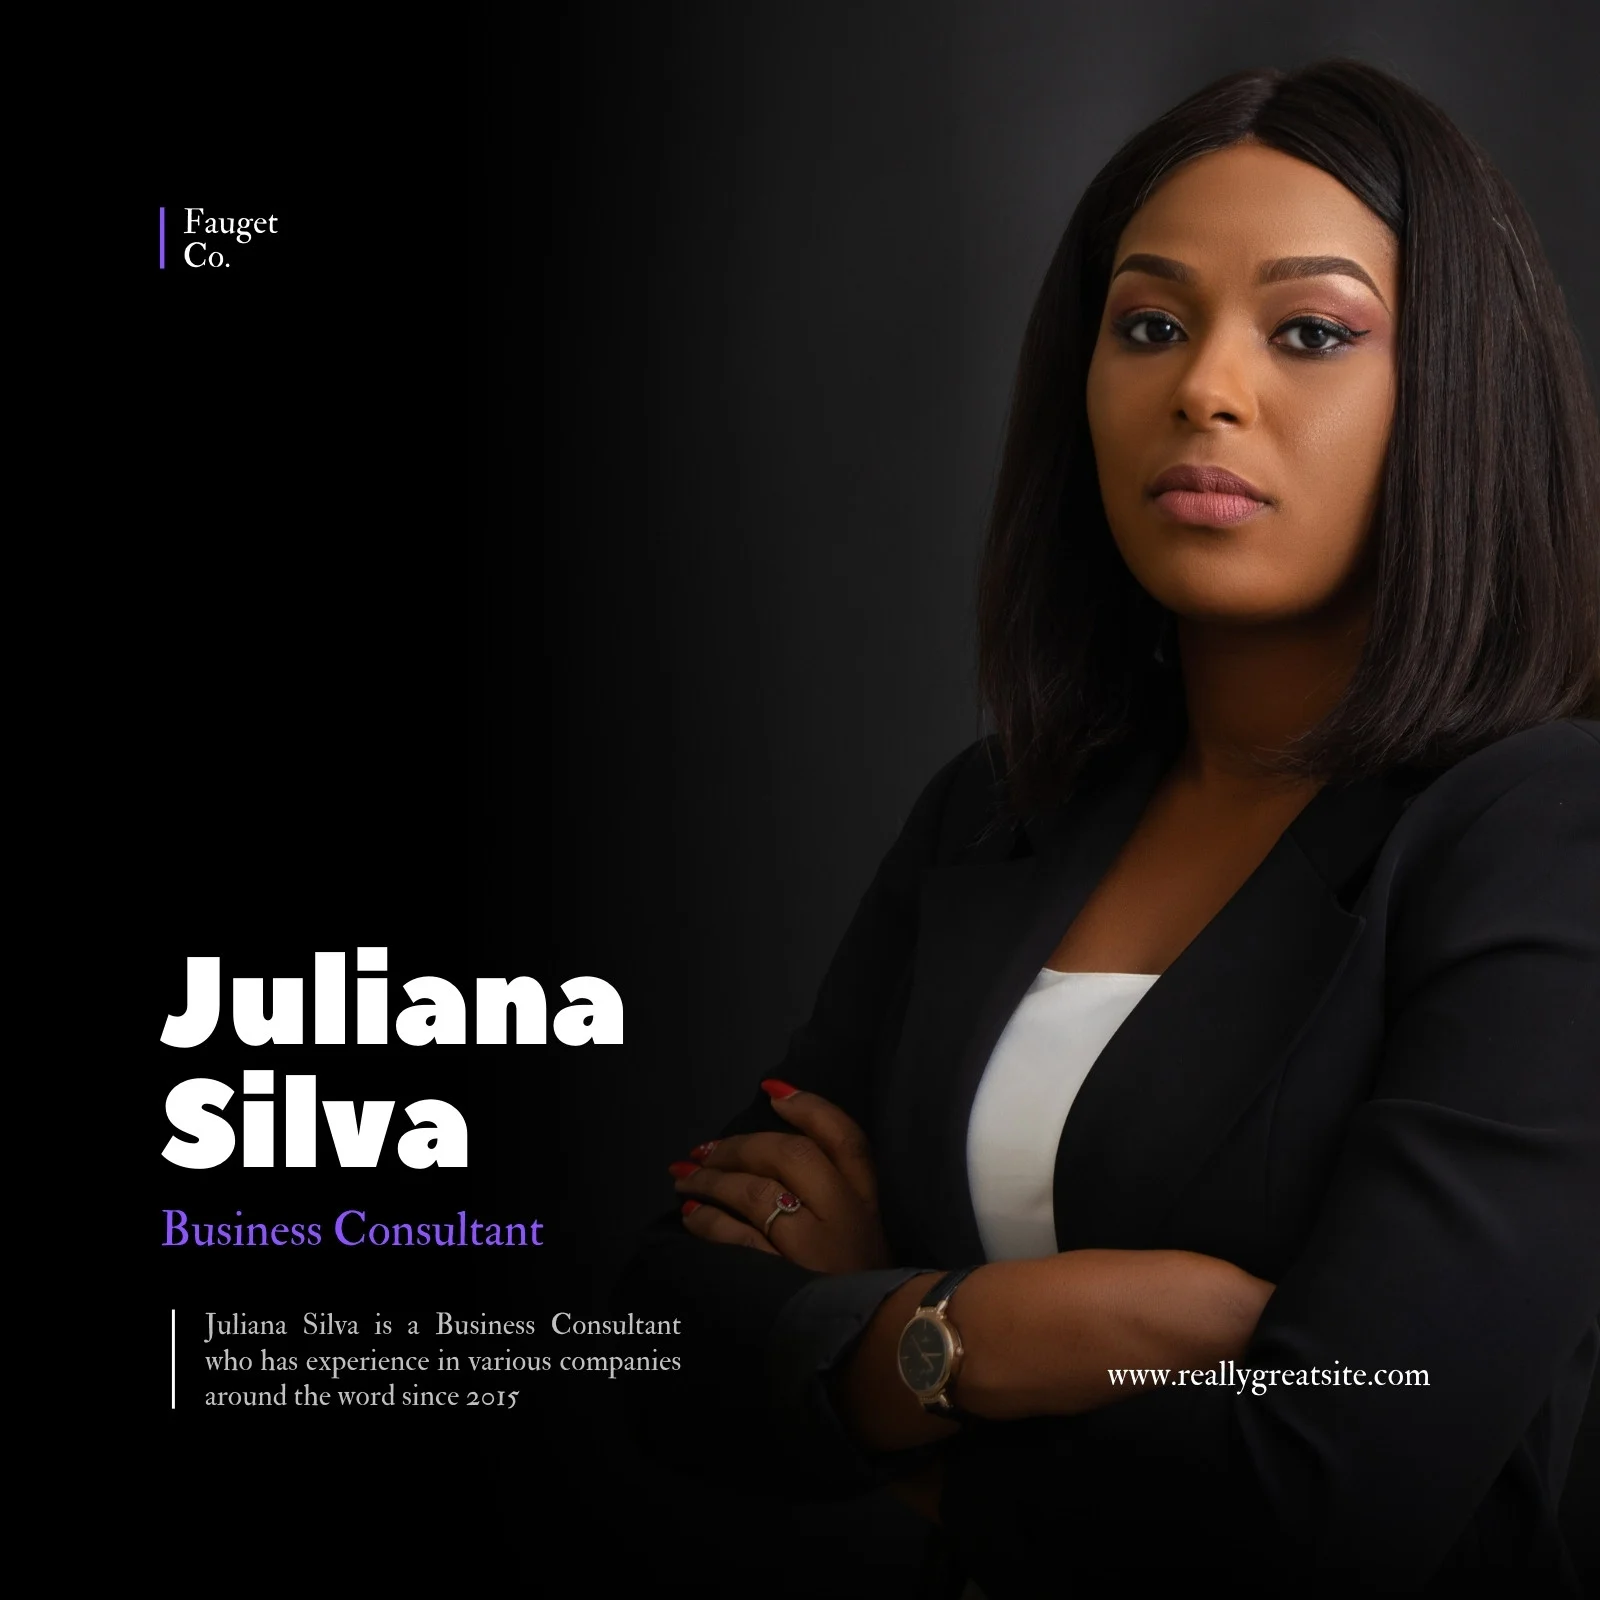
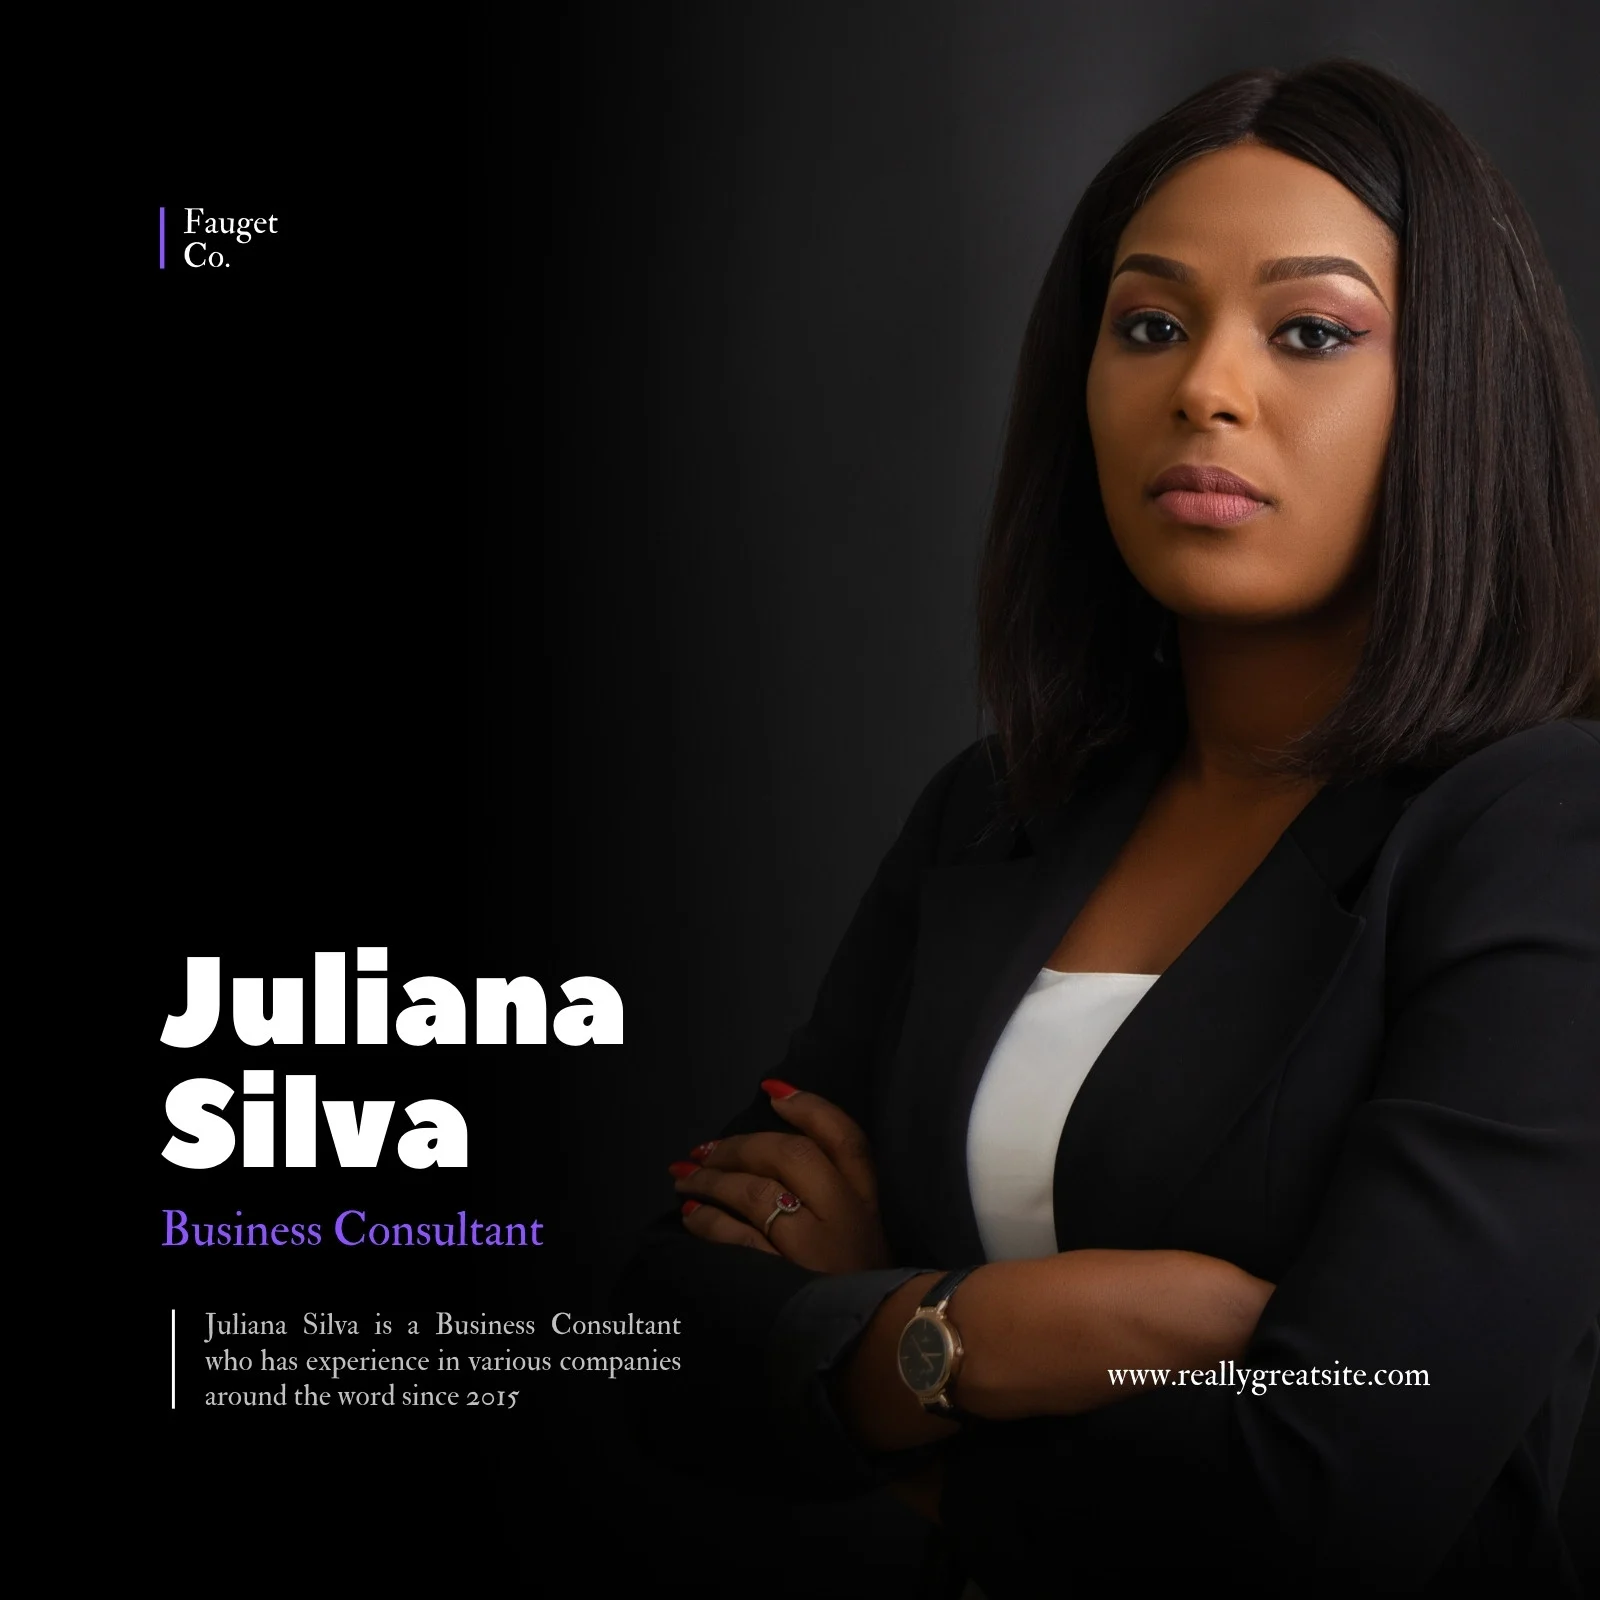
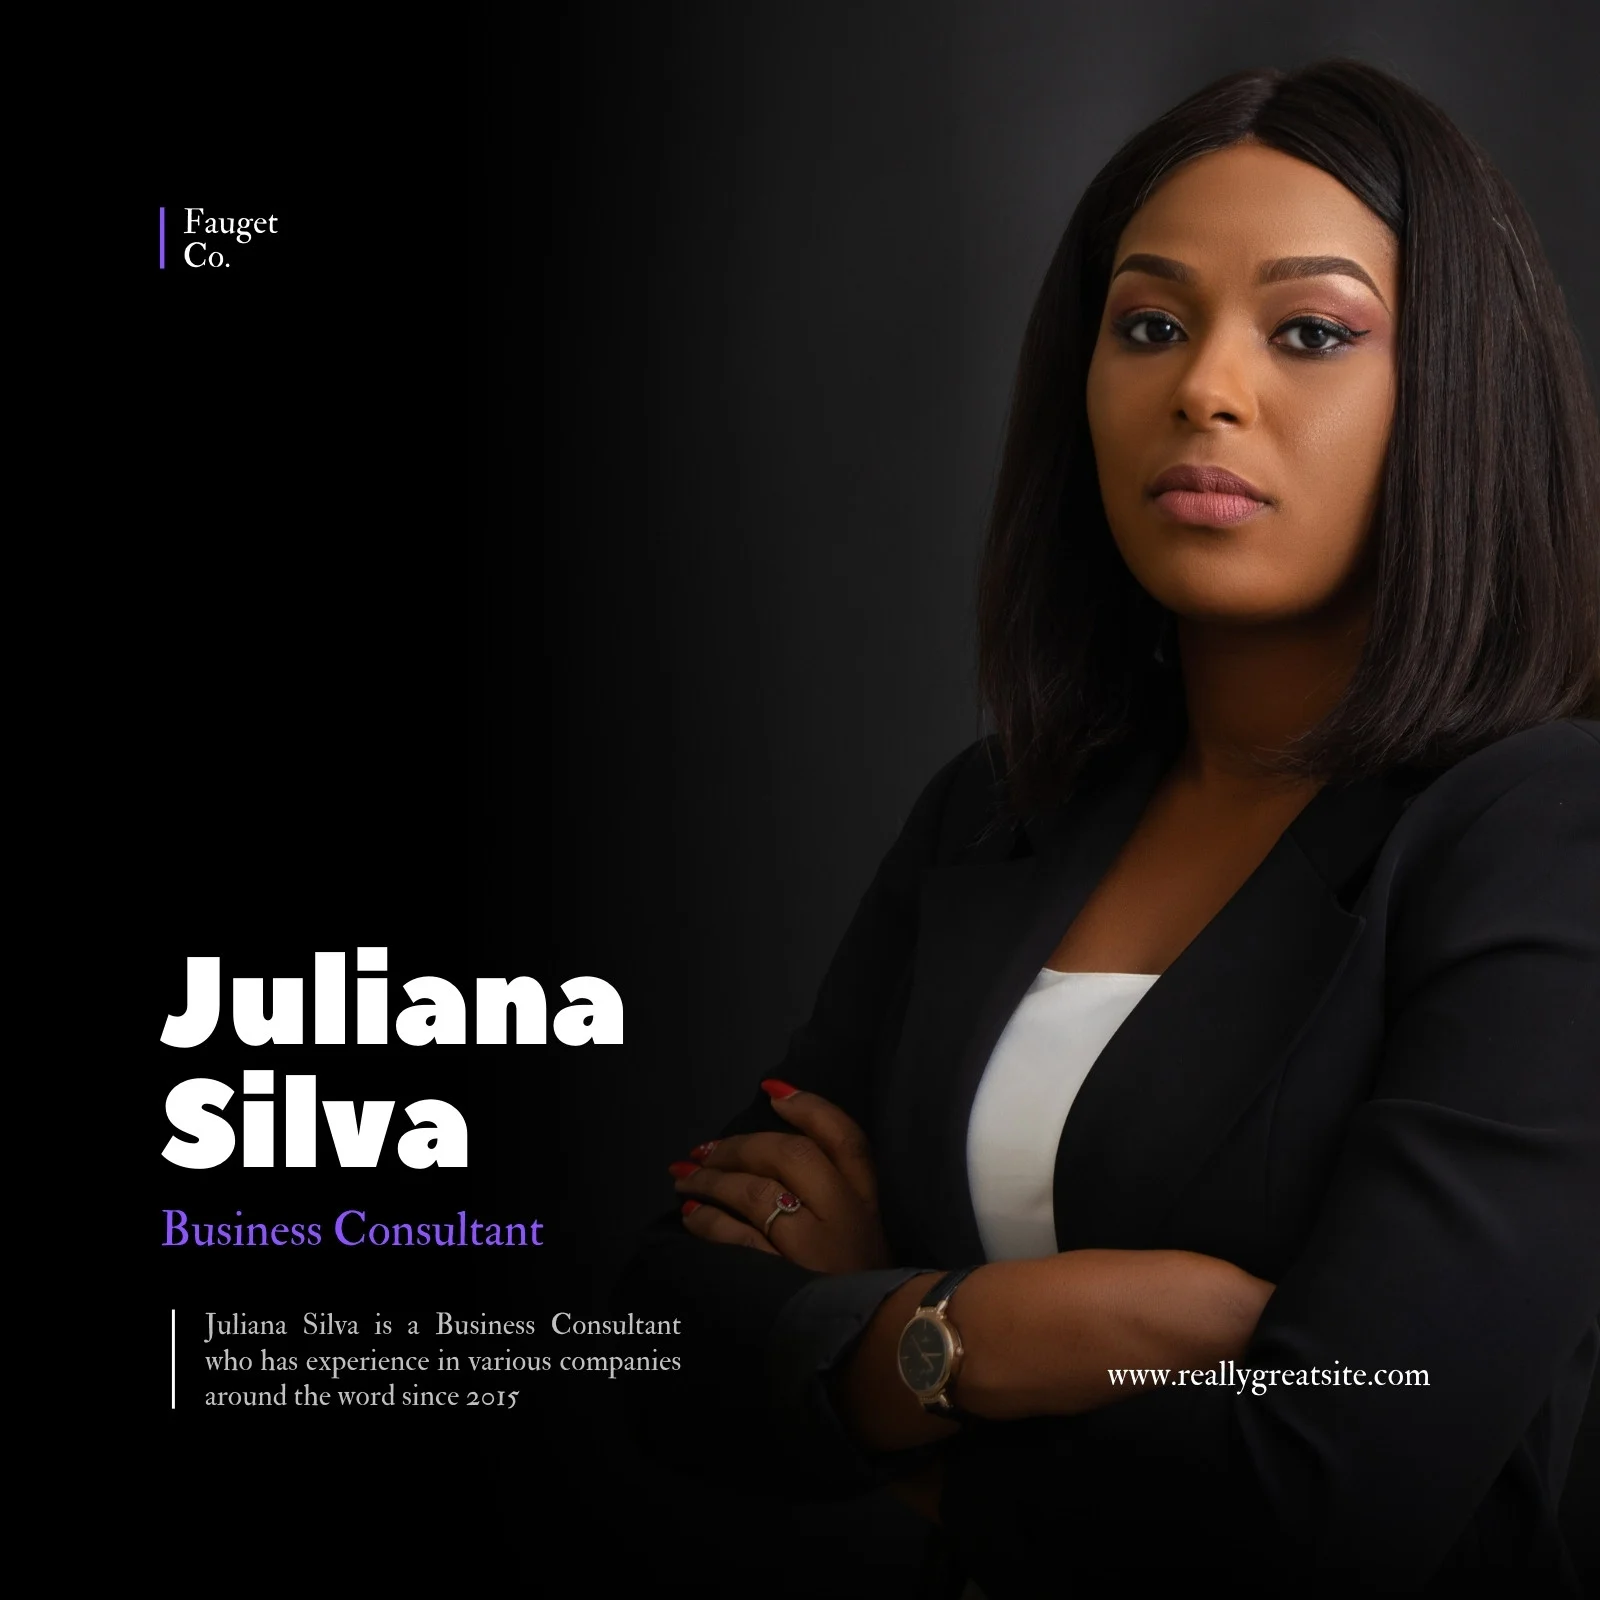

[3/7] Wrote 1600w-DVXZyB158ss/spec.json


16:23:44 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStVxC49SK1Yl9vtD7L06E9ADXEME", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#000000\",\n    \"has_background_image\": false,\n    \"background_image_description\": \"\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"Fauget Co.\",\n            \"x\": 20,\n            \"y\": 20,\n            \"width\": 100,\n            \"height\": 20,\n            \"font-family\": \"Arial\",\n            \"font-size\": 16,\n            \"color\": \"#ffffff\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"normal\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"none\"\n        },\n        {\n            \"type\": \"text\",\n            \"text\": \"Juliana Silva\",\n            \"x\": 20,\n            \"y\":
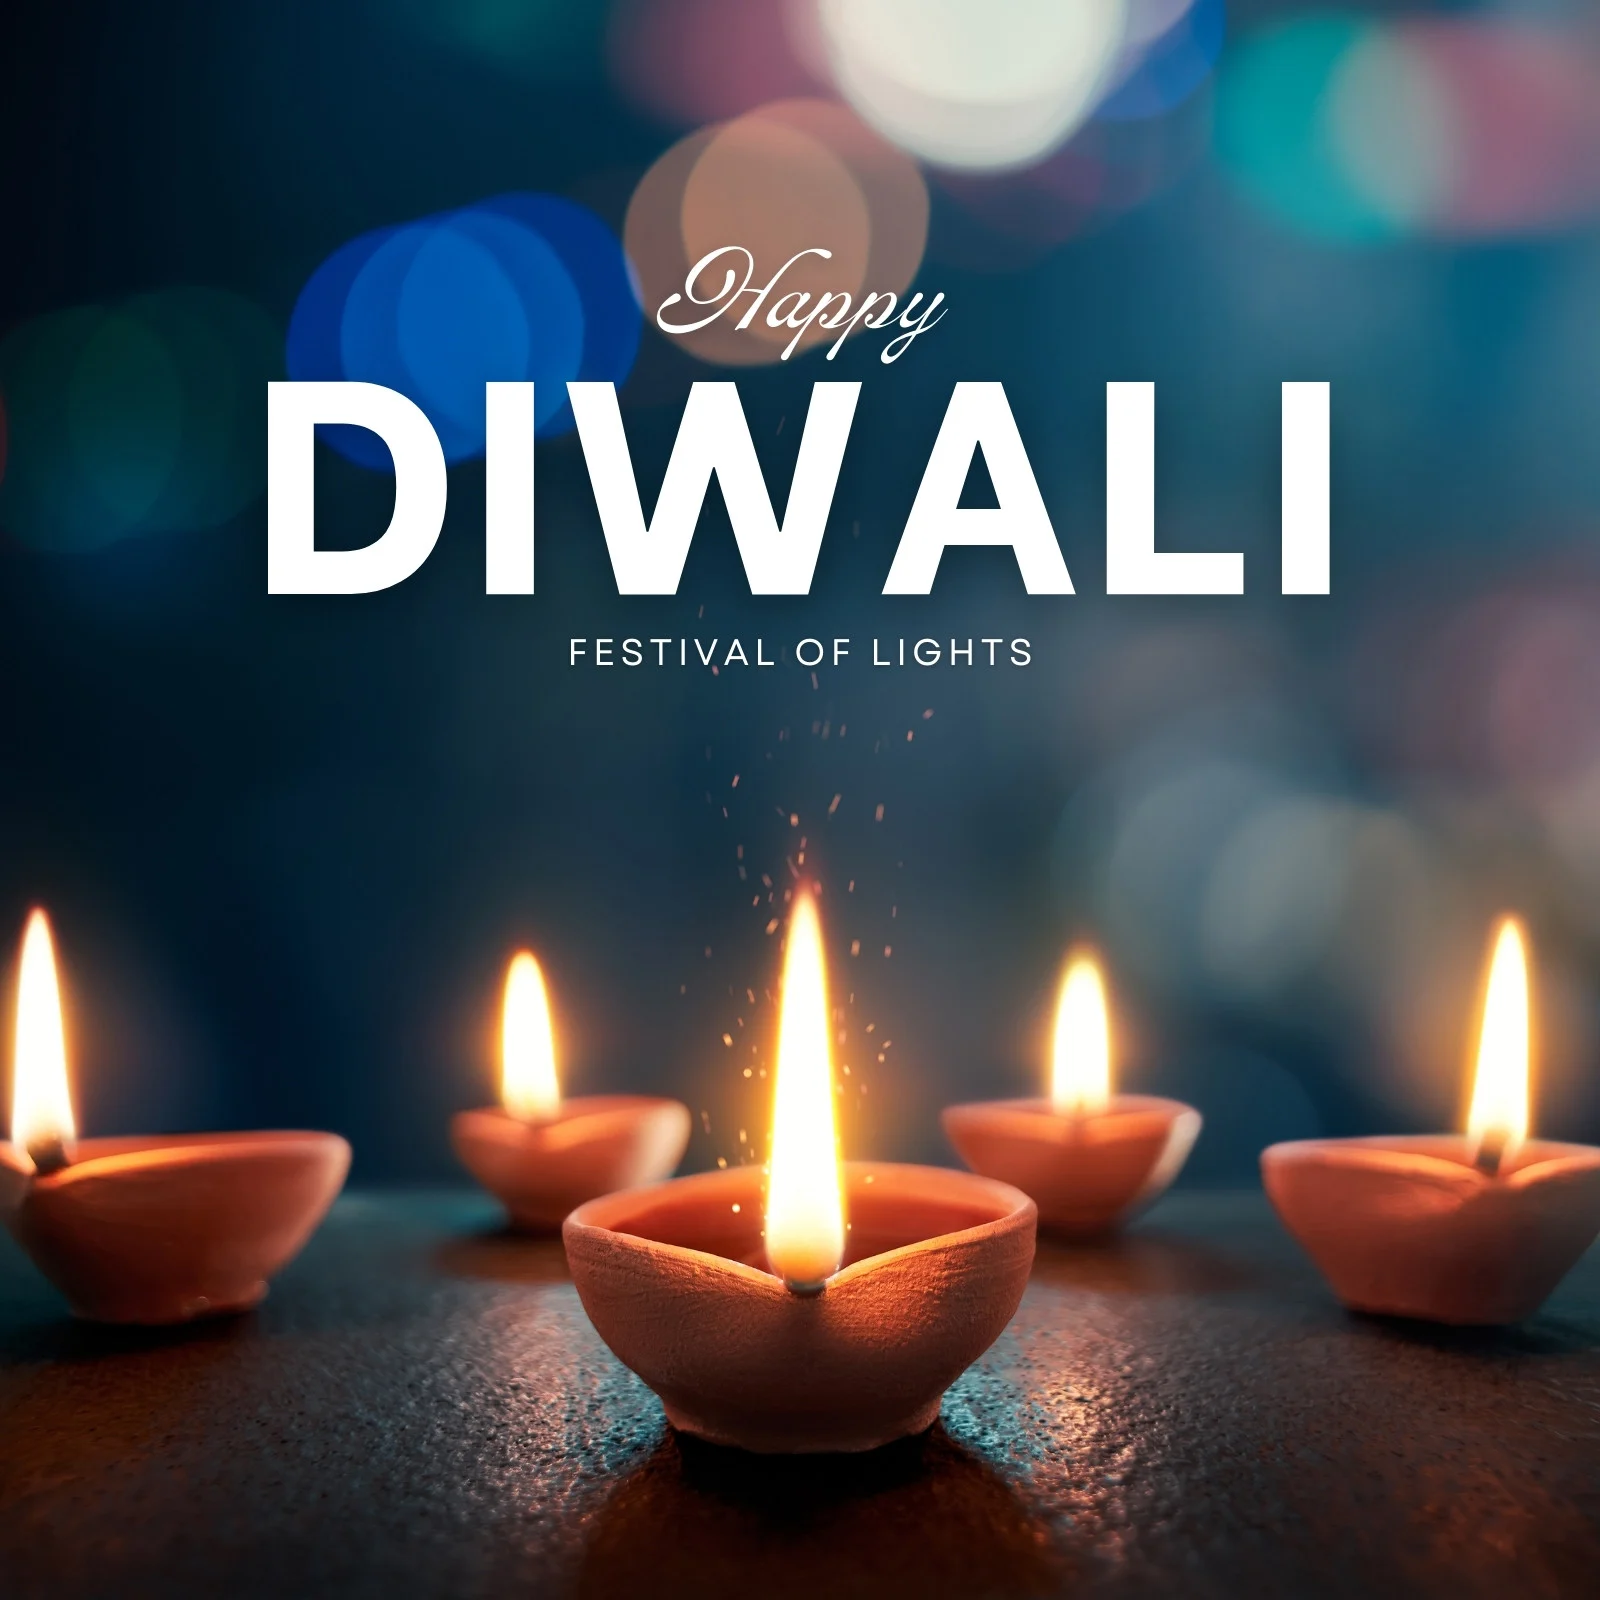
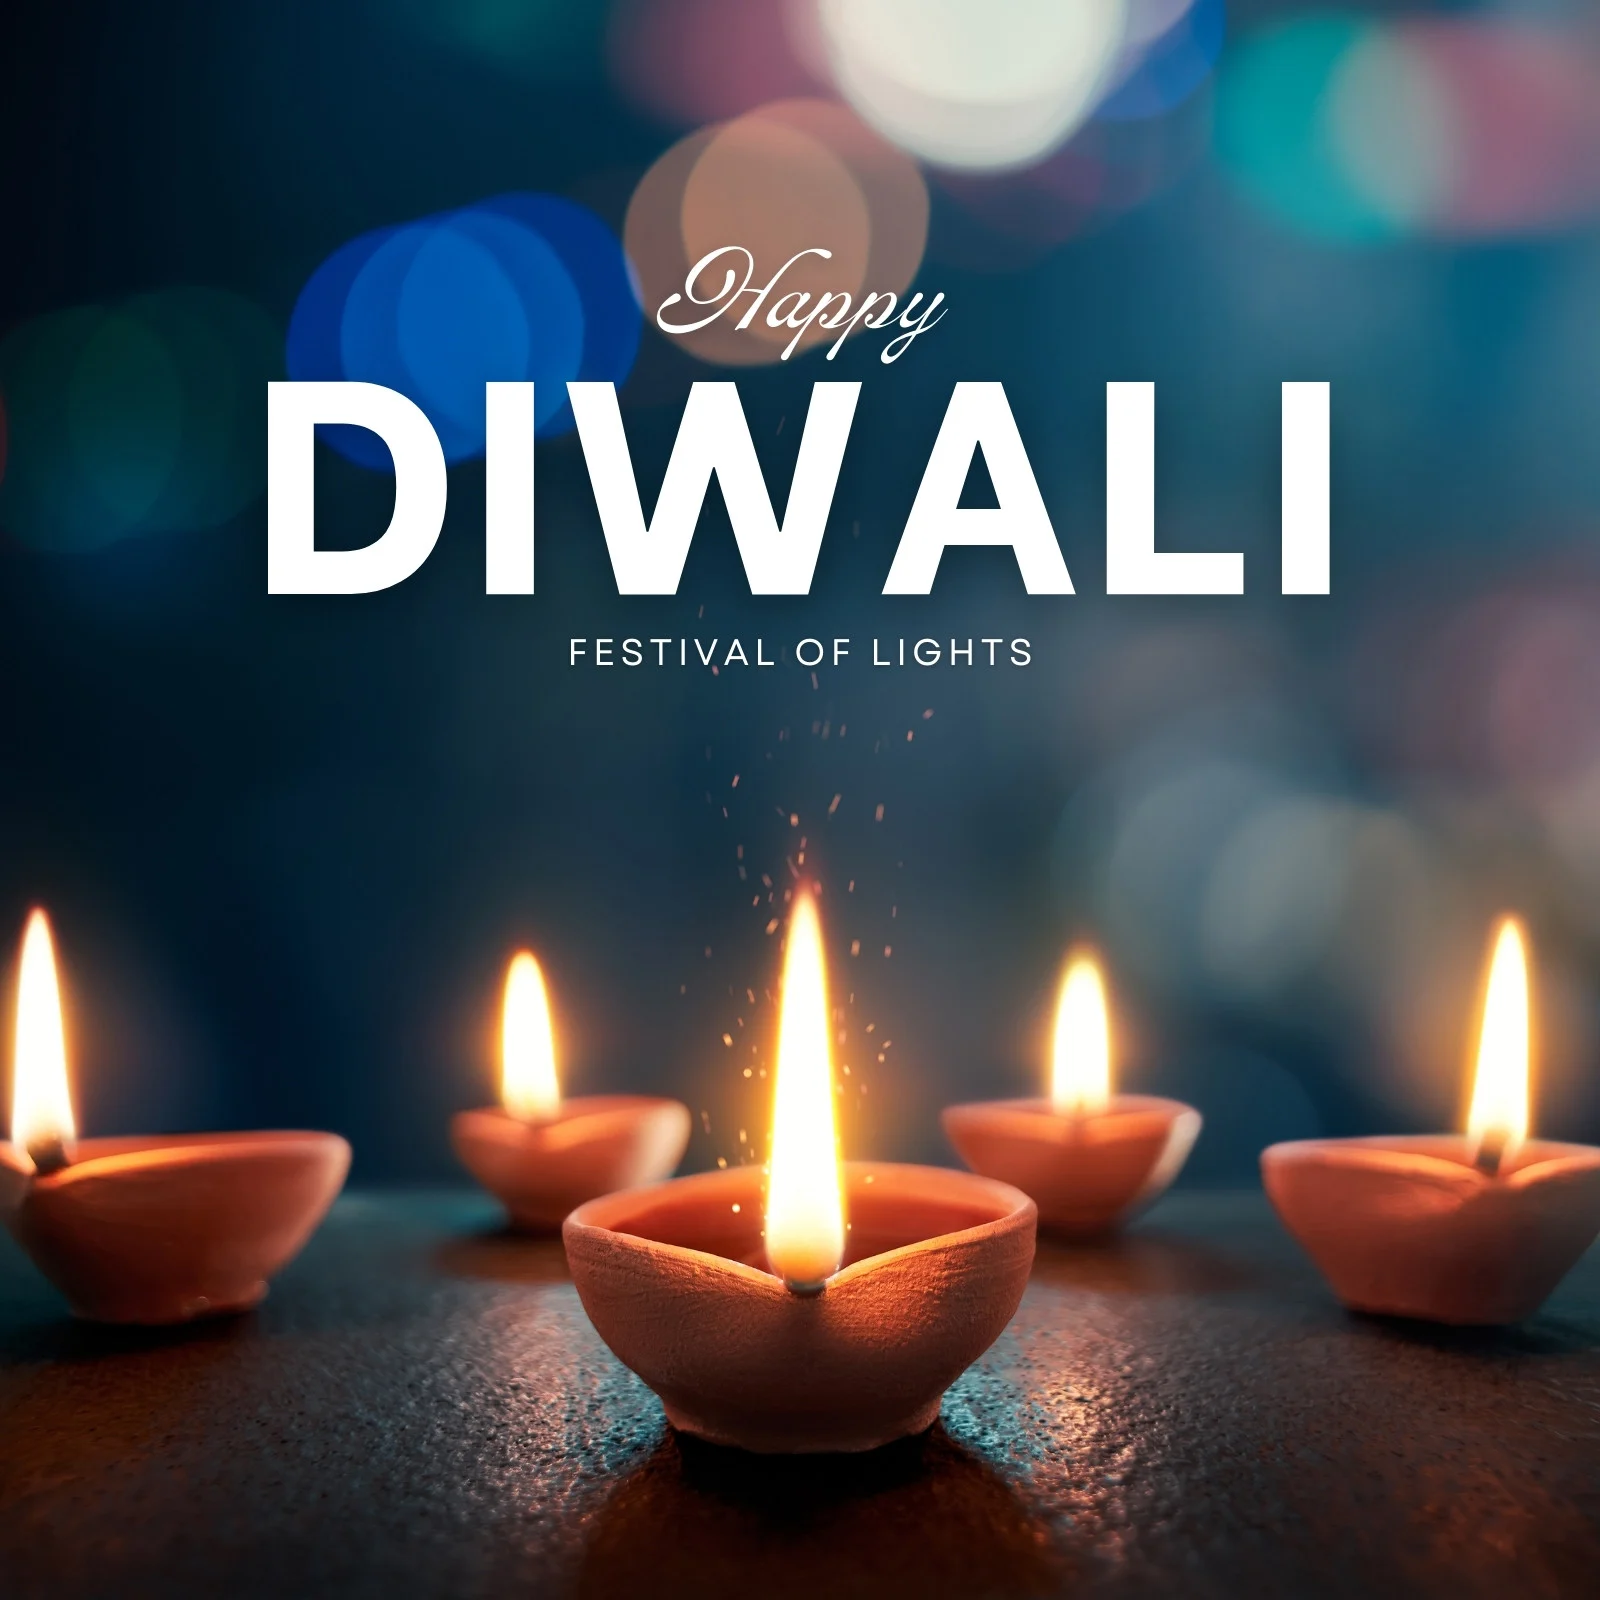
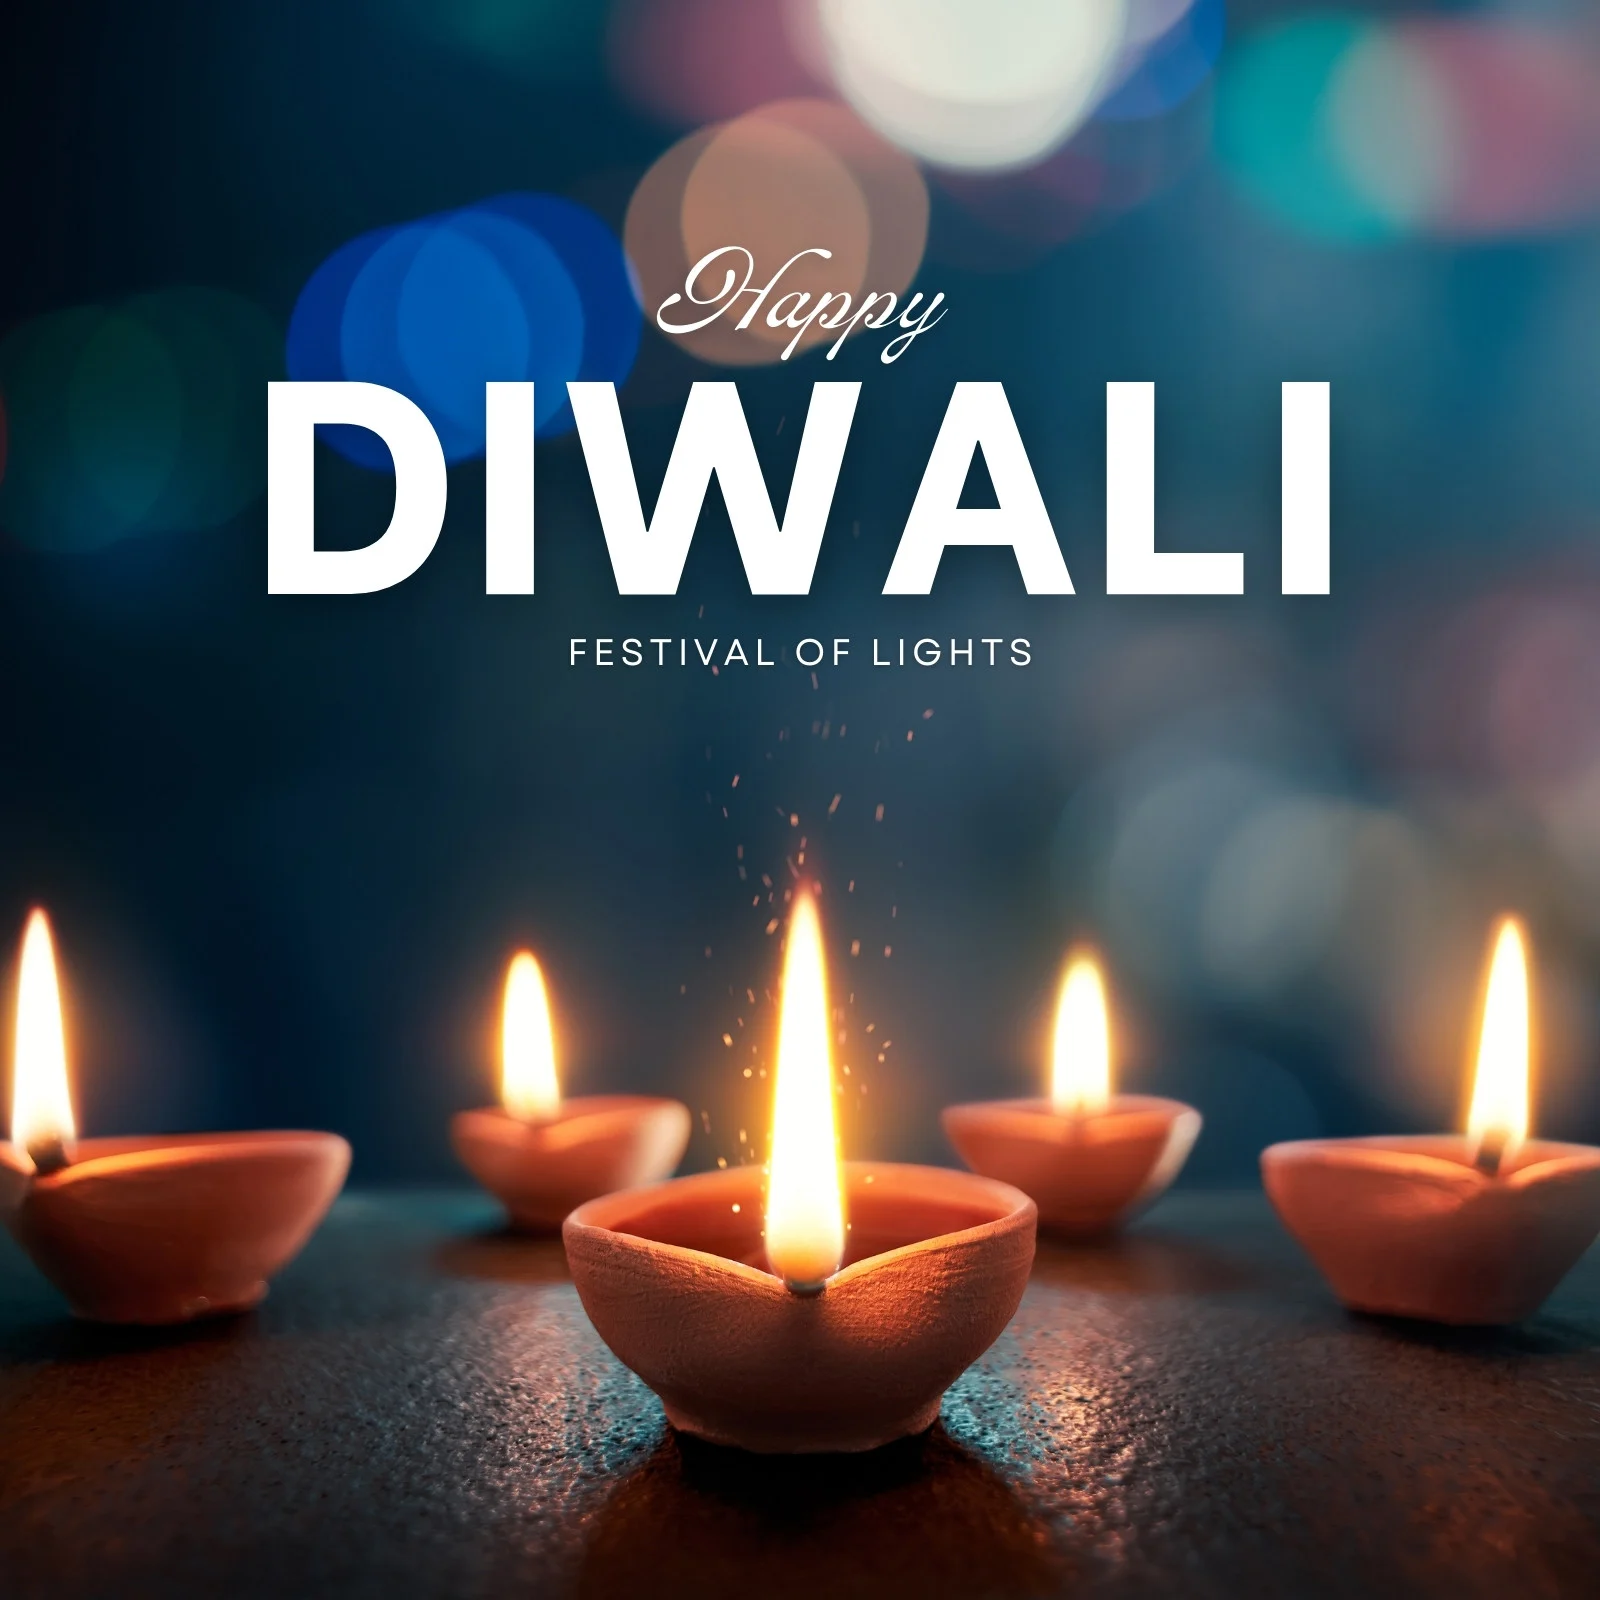

[4/7] Wrote 1600w-9JTrLkx-Ppg/spec.json


16:23:51 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStW5EYzuffm08zyBQ67Ru1GTbThl", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#000000\",\n    \"has_background_image\": true,\n    \"background_image_description\": \"A blurred background with colorful bokeh lights, creating a festive atmosphere.\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"Happy\",\n            \"x\": 210,\n            \"y\": 100,\n            \"width\": 100,\n            \"height\": 40,\n            \"font-family\": \"Arial\",\n            \"font-size\": 24,\n            \"color\": \"#FFFFFF\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"normal\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"uppercase\"\n        },\n        {\n            \"type\": \"text\",\n    
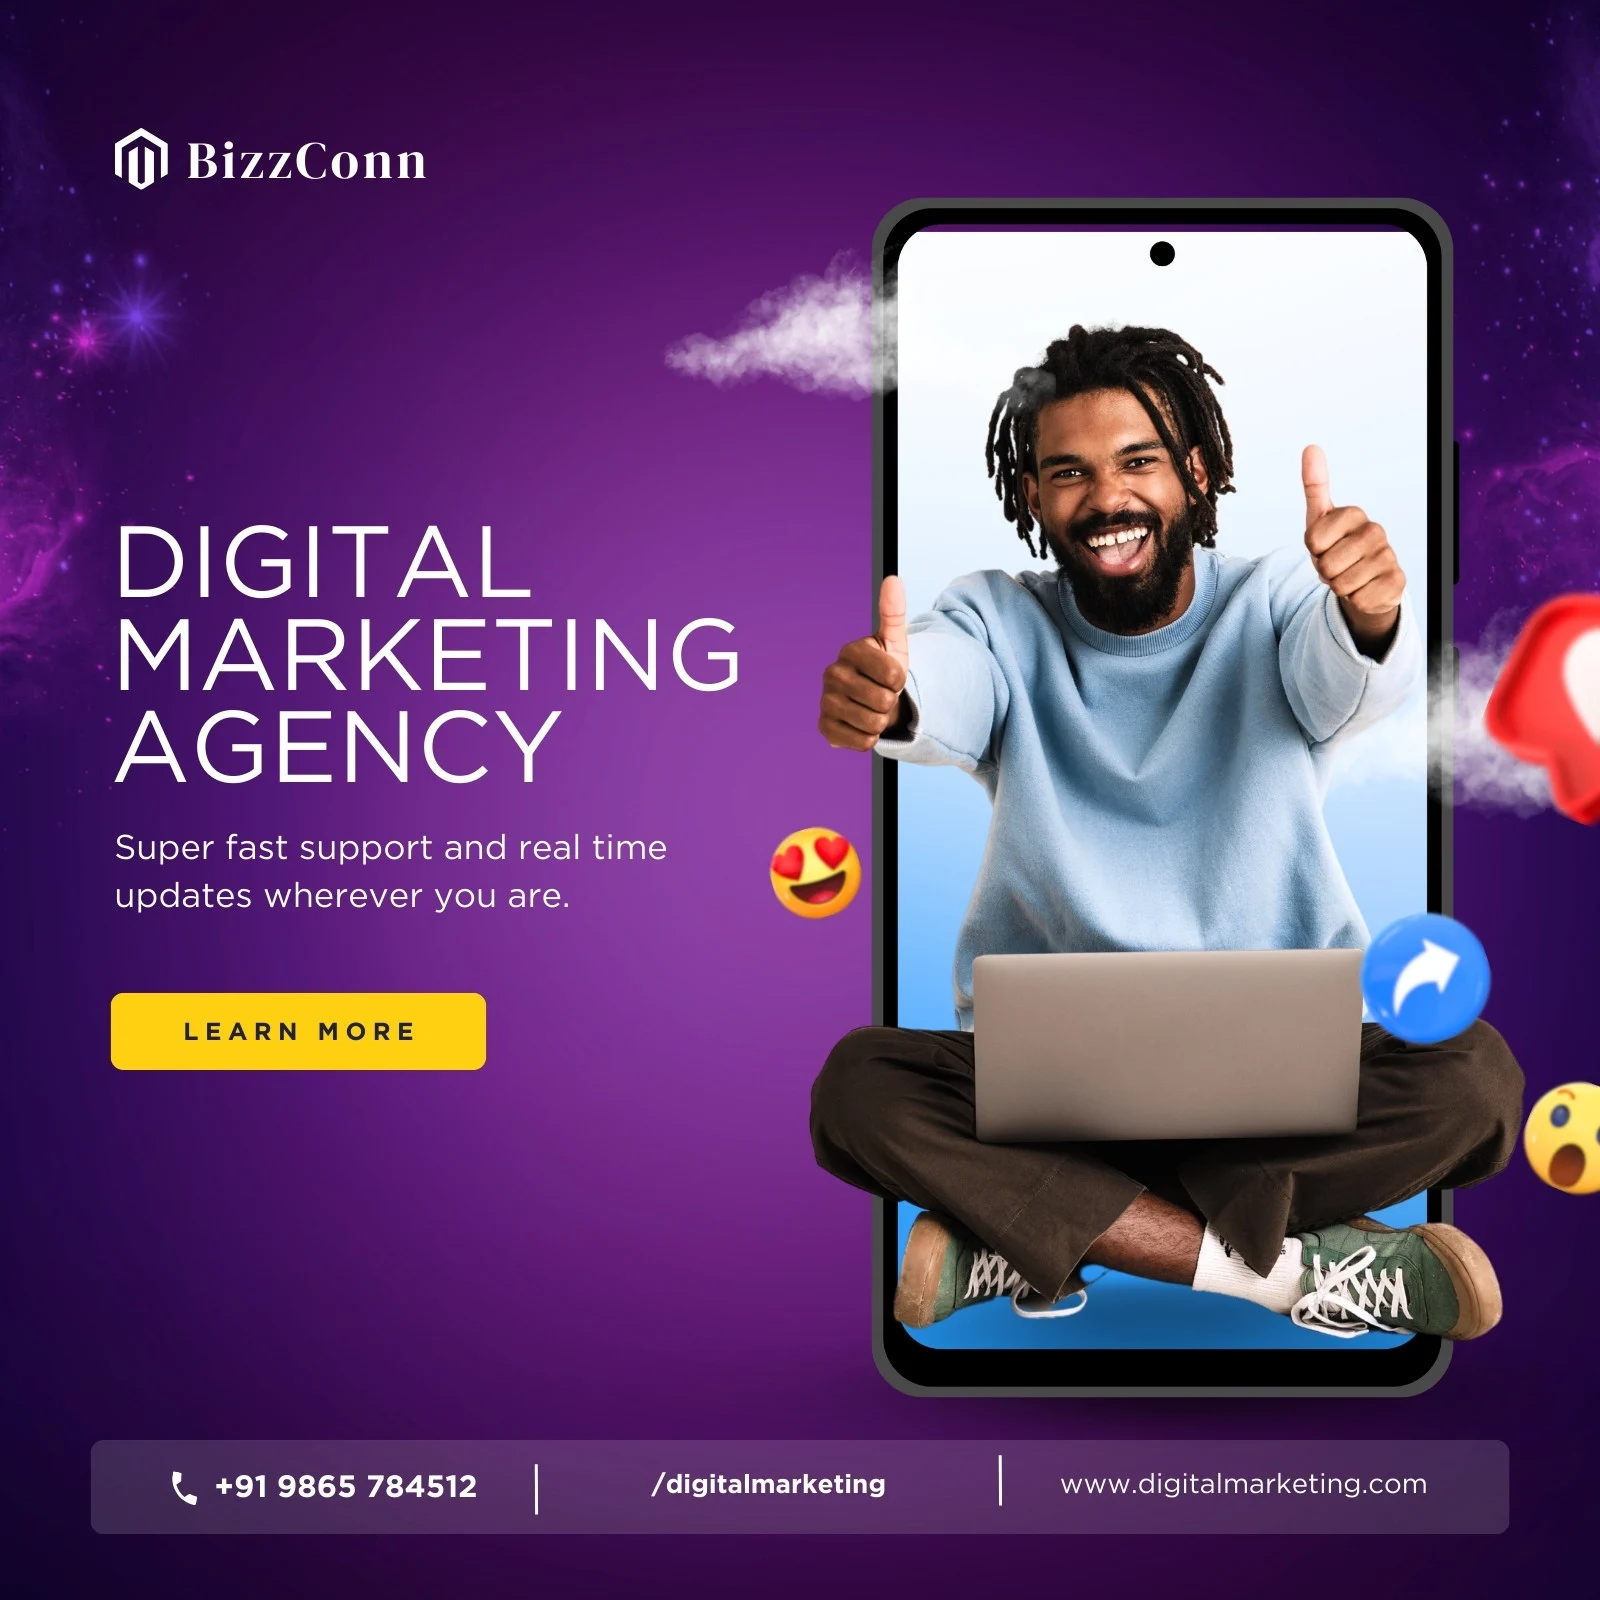
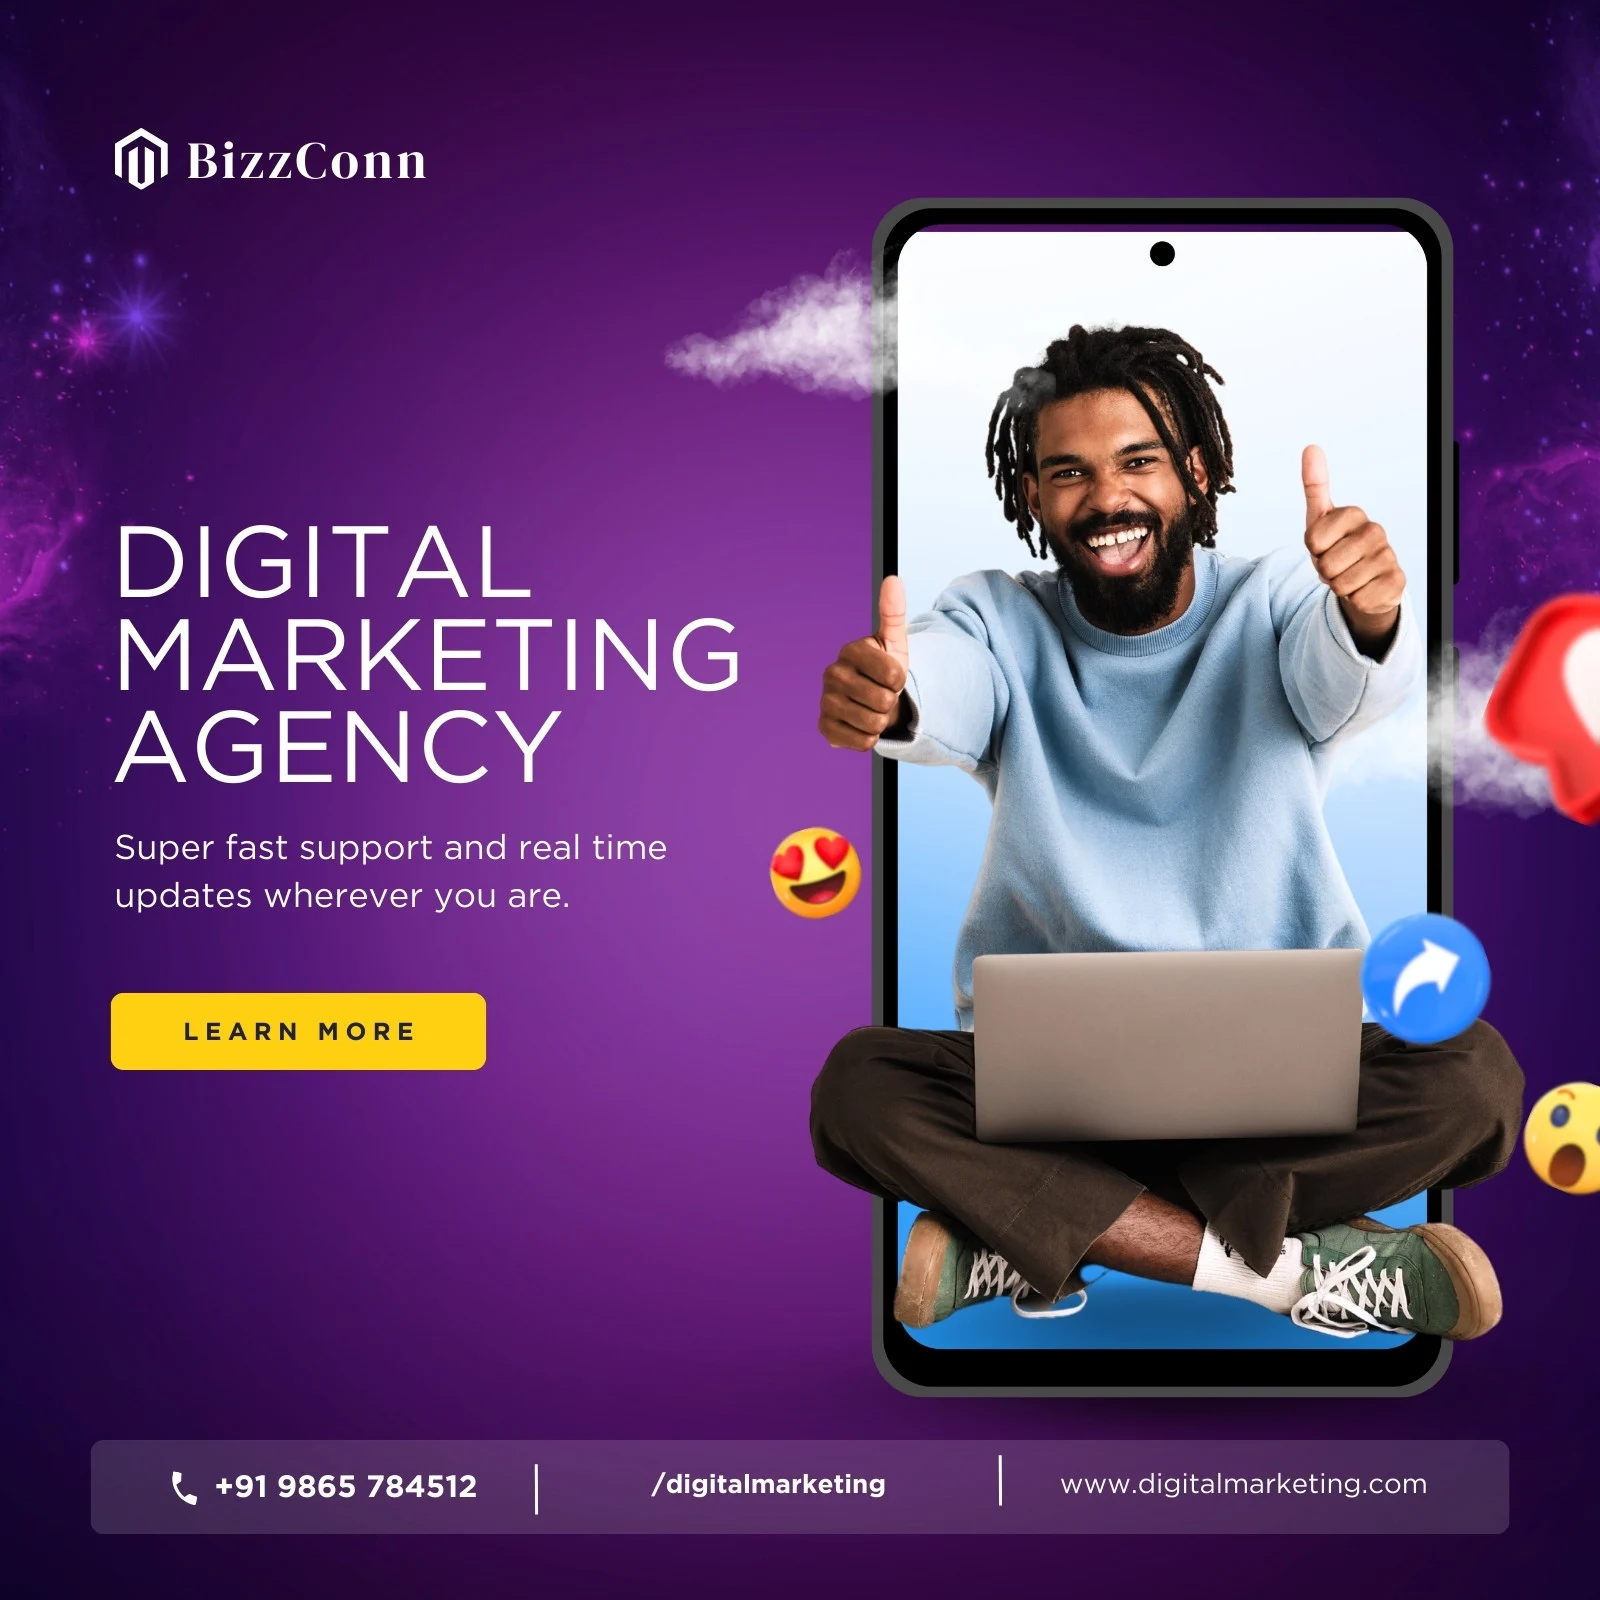
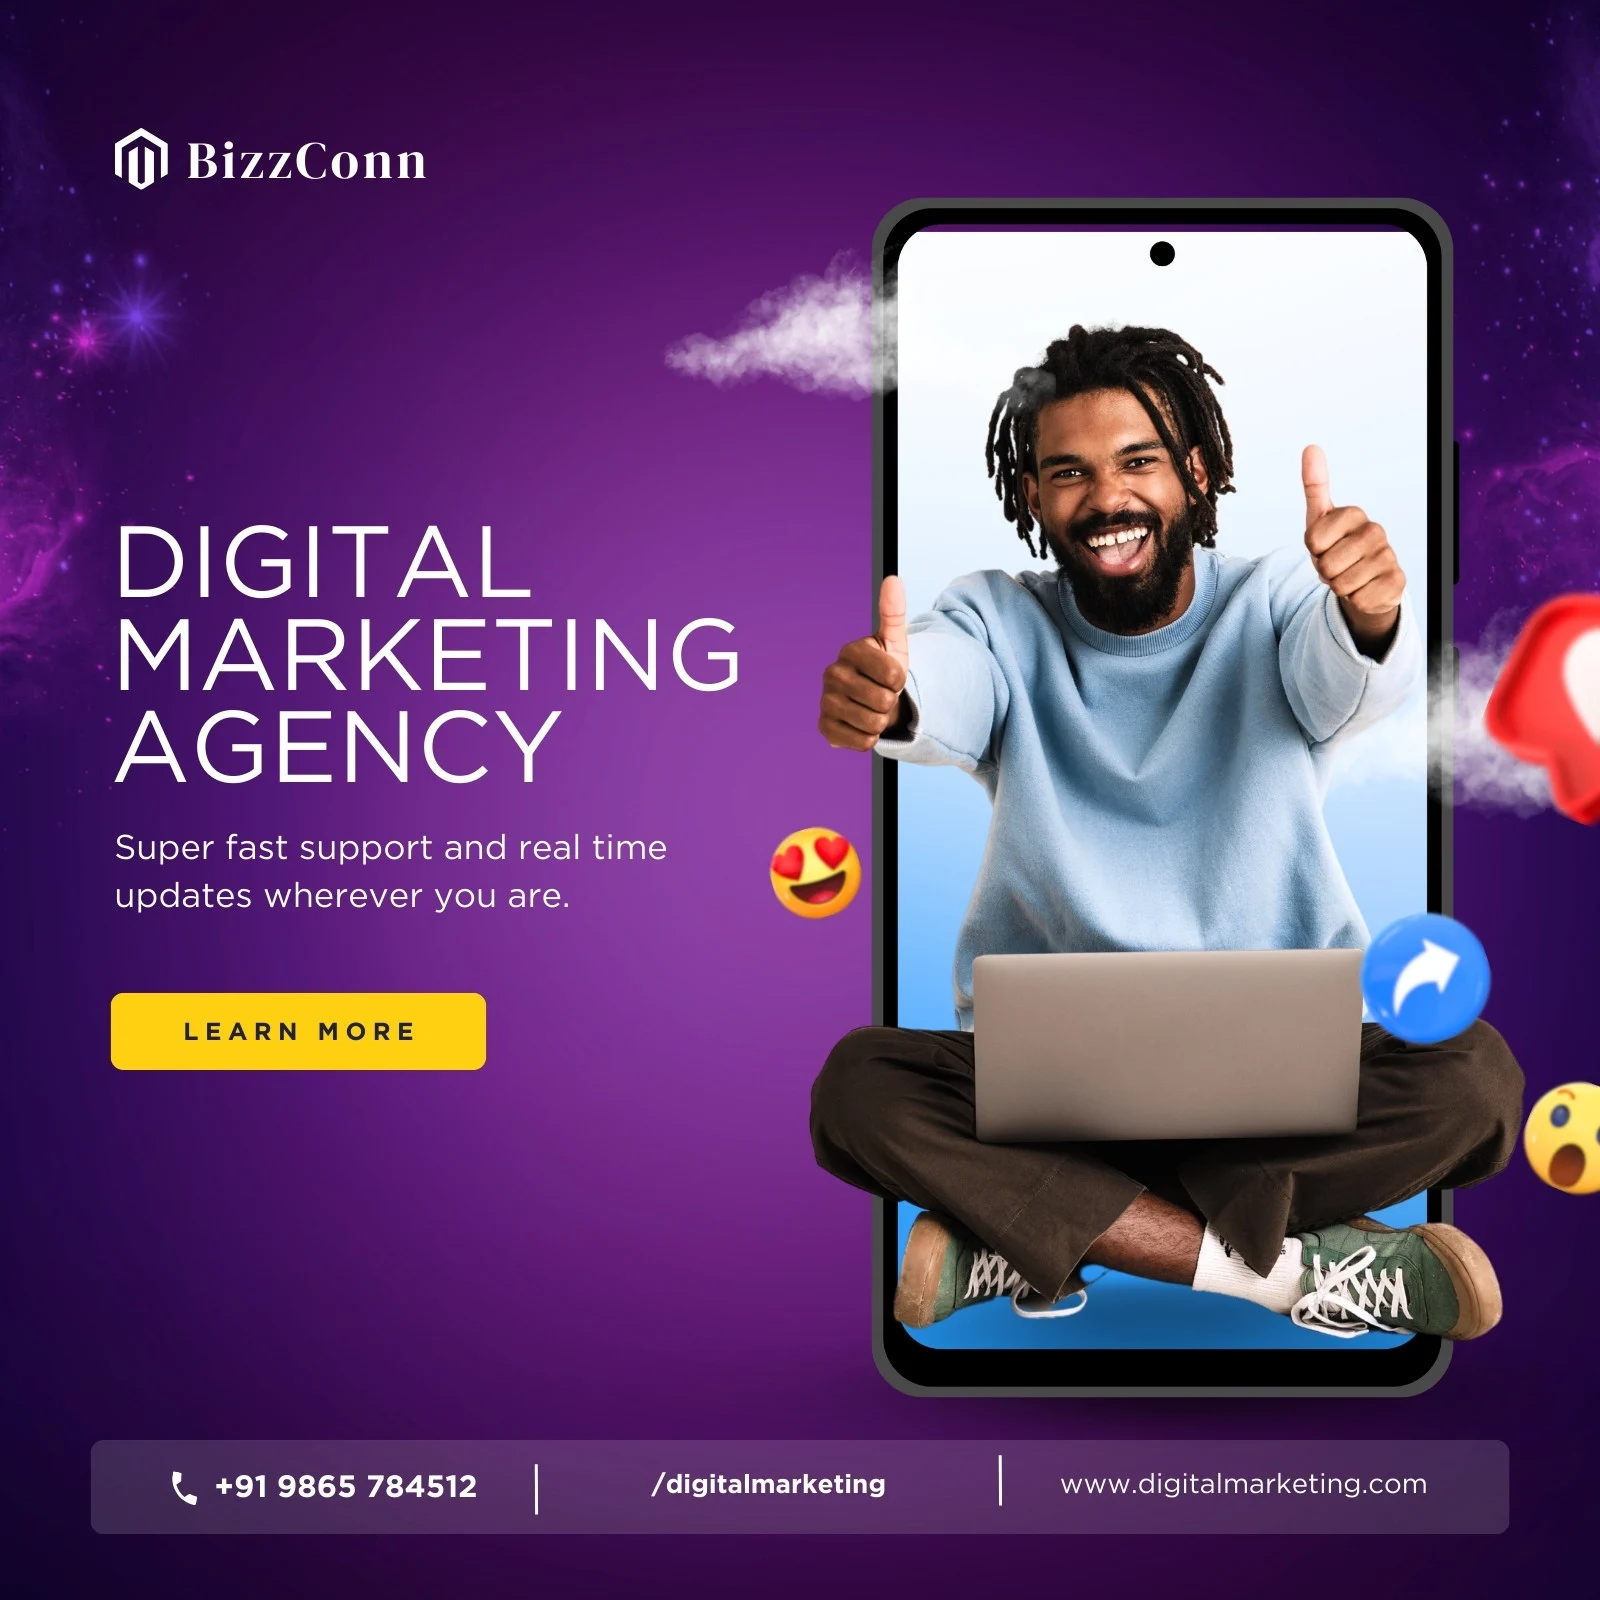

[5/7] Wrote 1600w-u6z_9iKj-iQ/spec.json


16:24:02 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStWBMCAhdfEV1Ky3eyKxEaHXG5IO", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#6a1b9a\",\n    \"has_background_image\": true,\n    \"background_image_description\": \"A gradient purple background with a cosmic theme featuring stars and clouds.\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"DIGITAL MARKETING AGENCY\",\n            \"x\": 50,\n            \"y\": 100,\n            \"width\": 300,\n            \"height\": 40,\n            \"font-family\": \"Arial\",\n            \"font-size\": 24,\n            \"color\": \"#ffffff\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"bold\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"uppercase\"\n        },\n        {\n            \"type\": \"
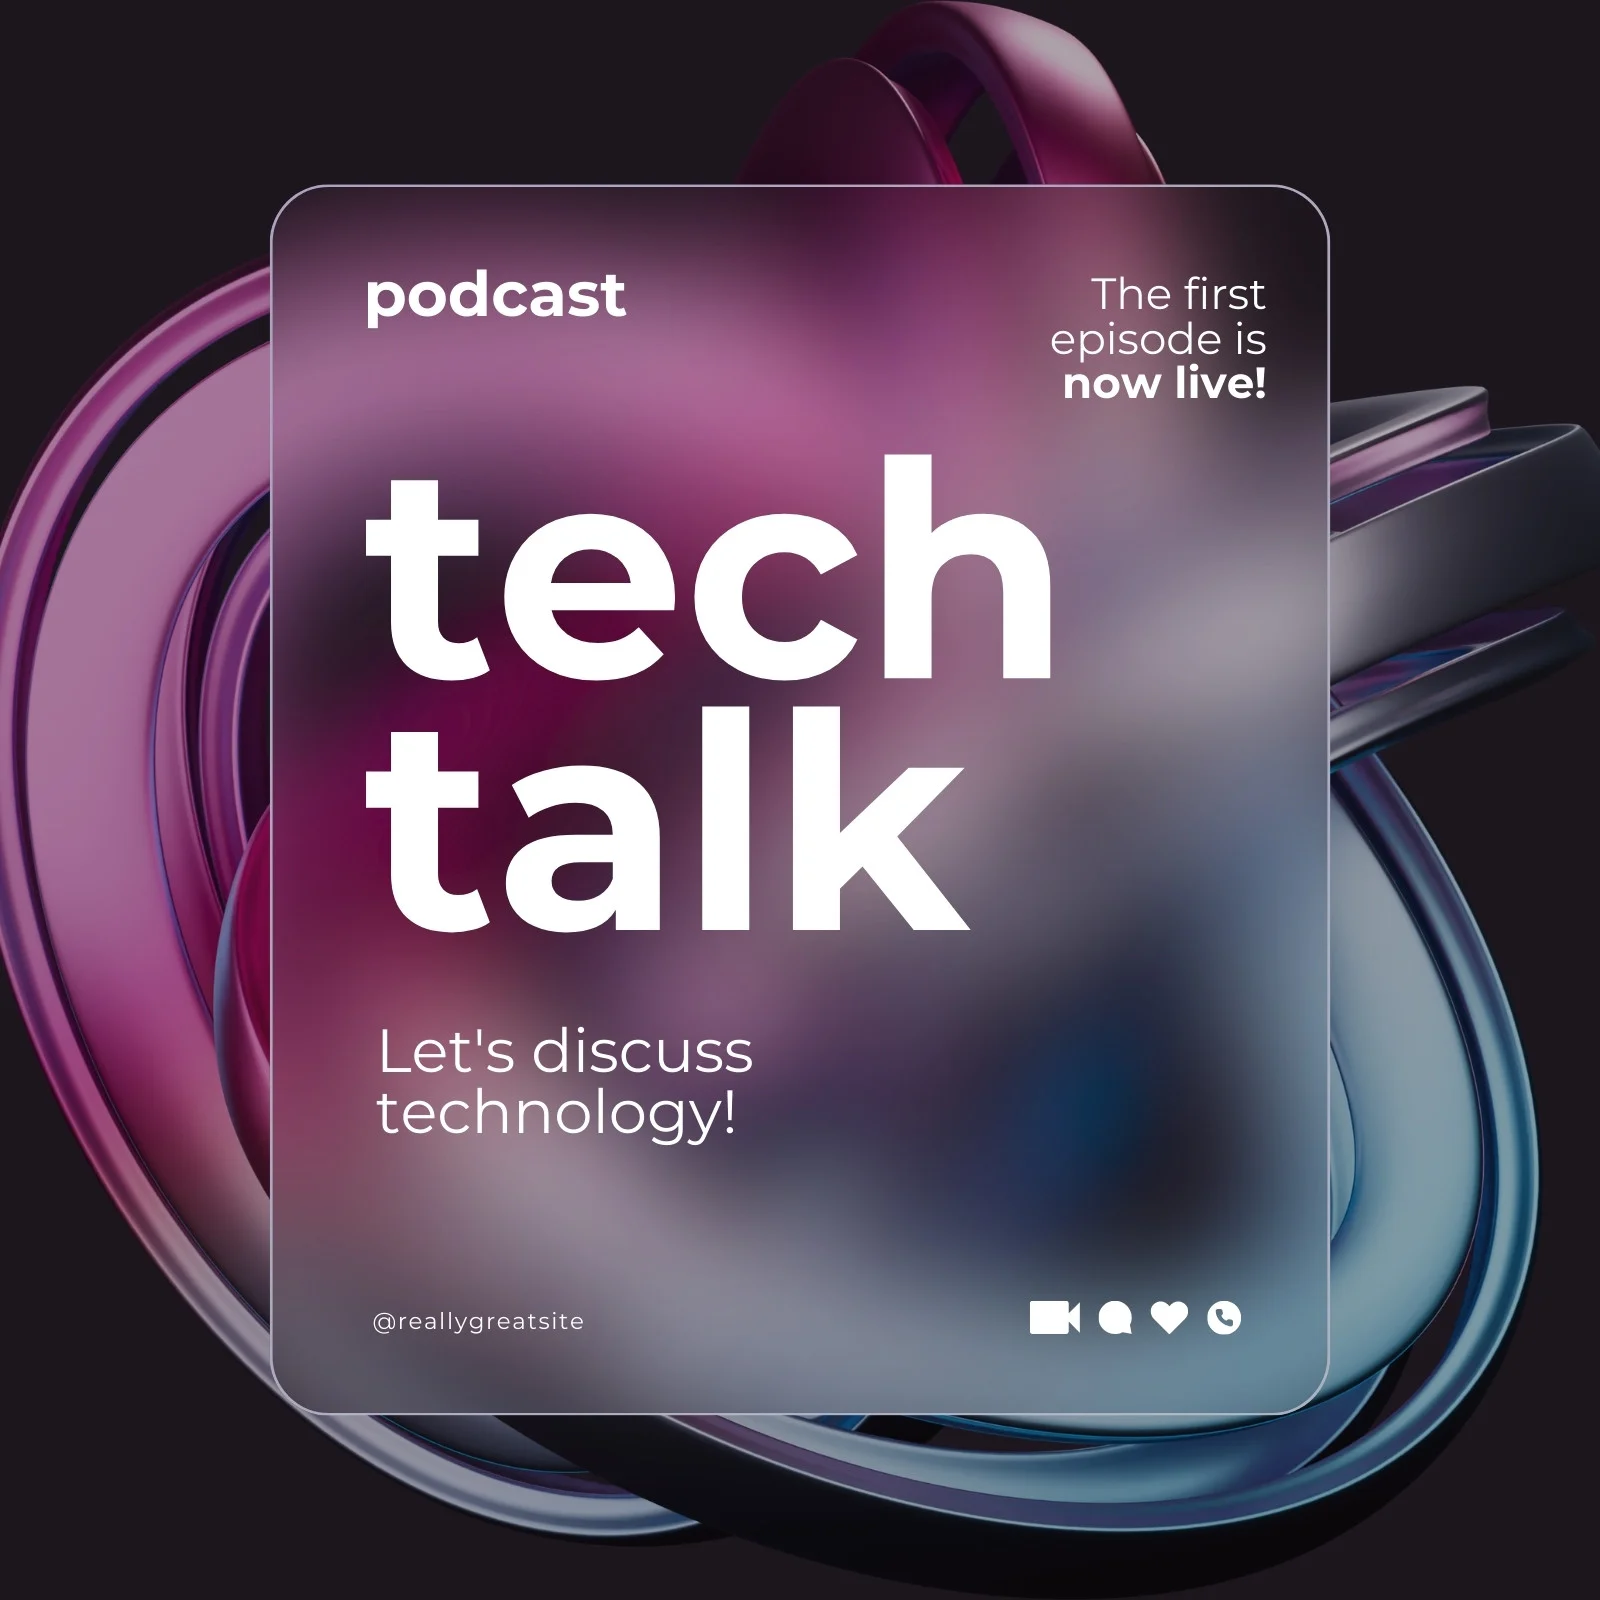
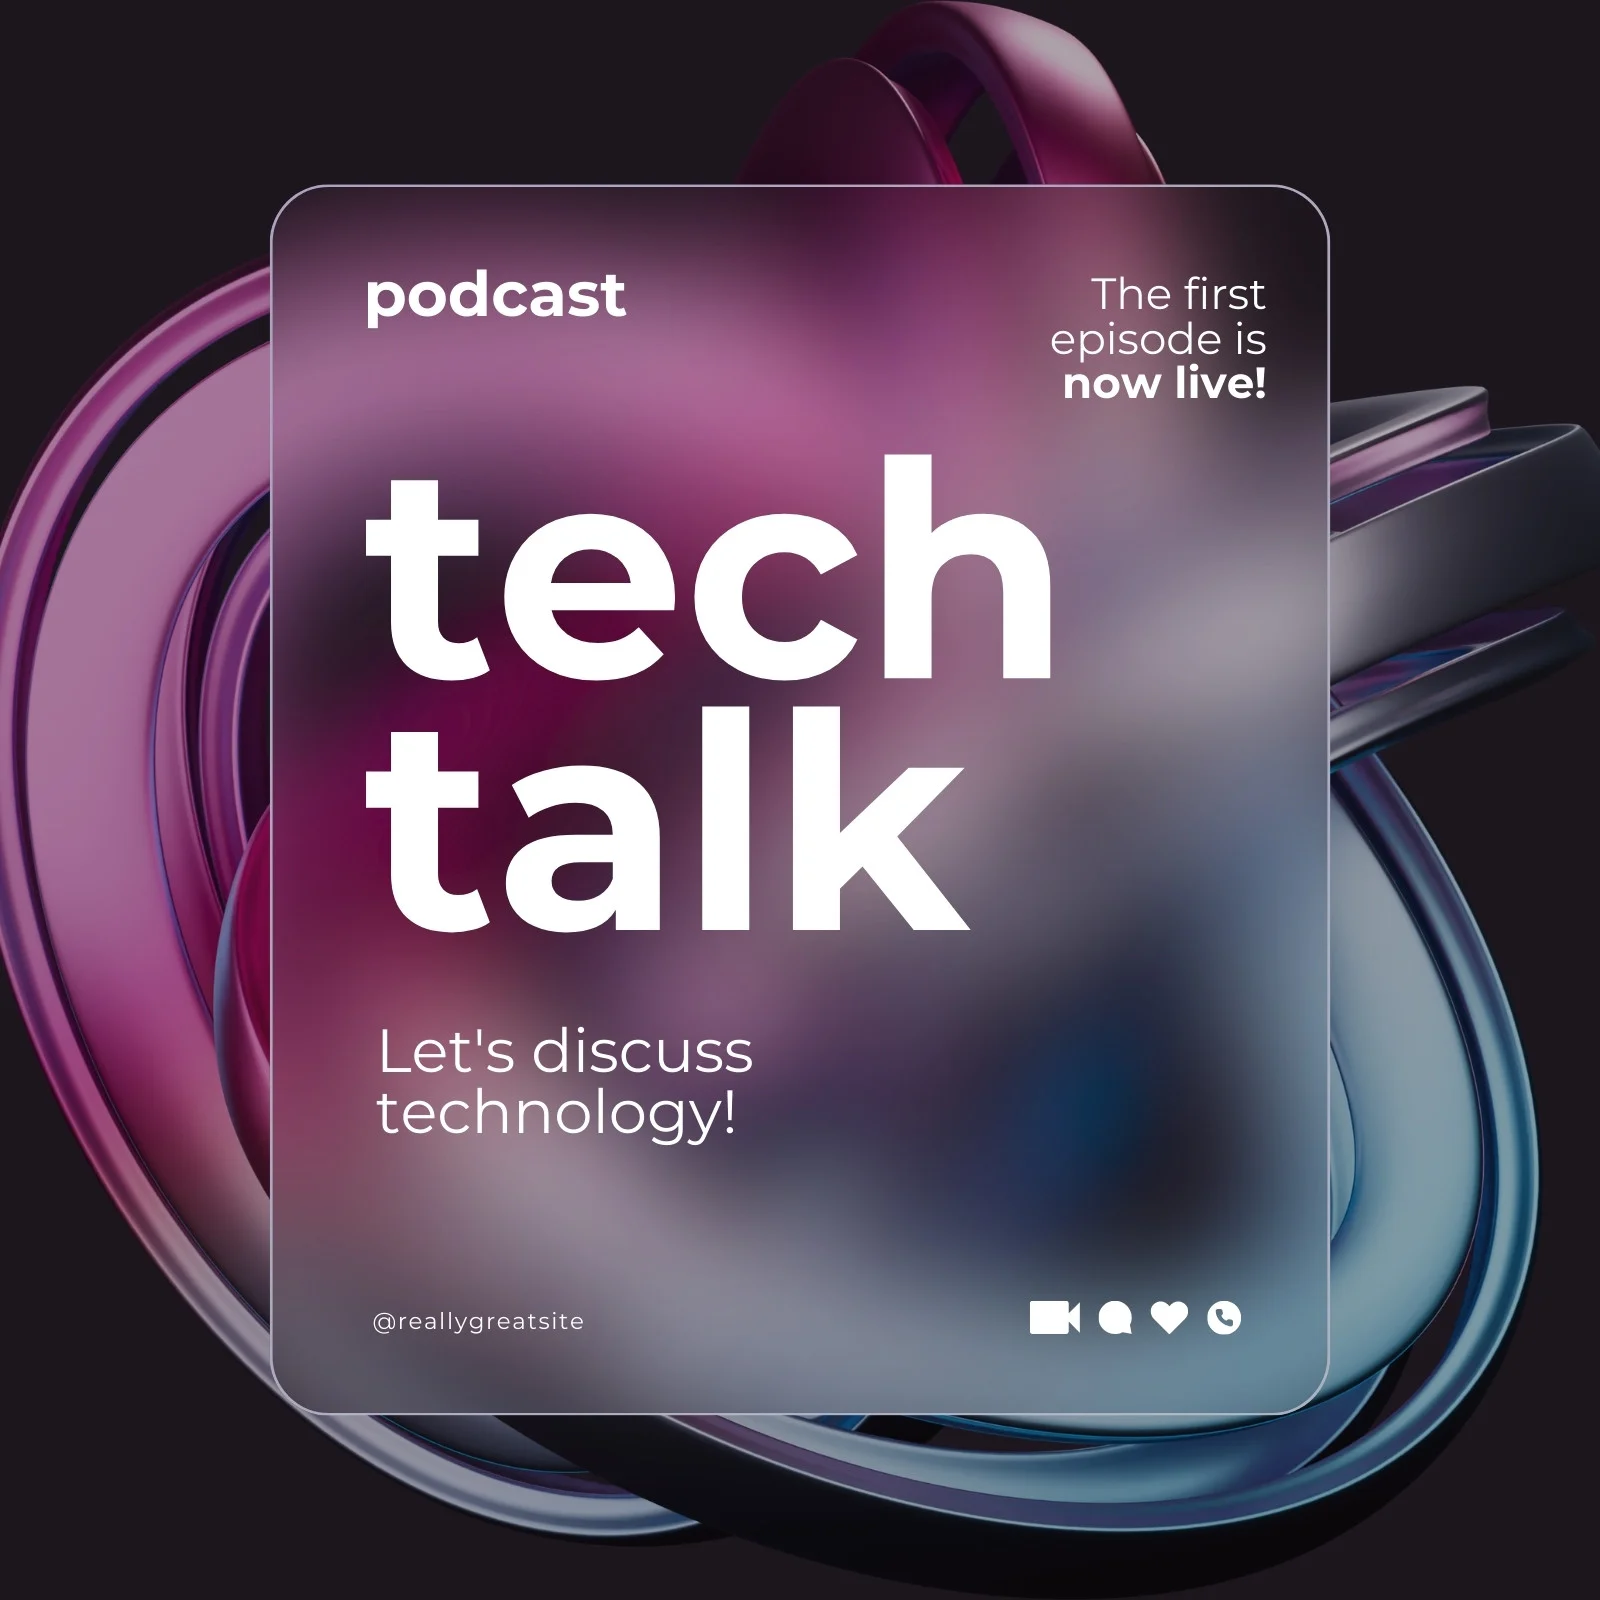
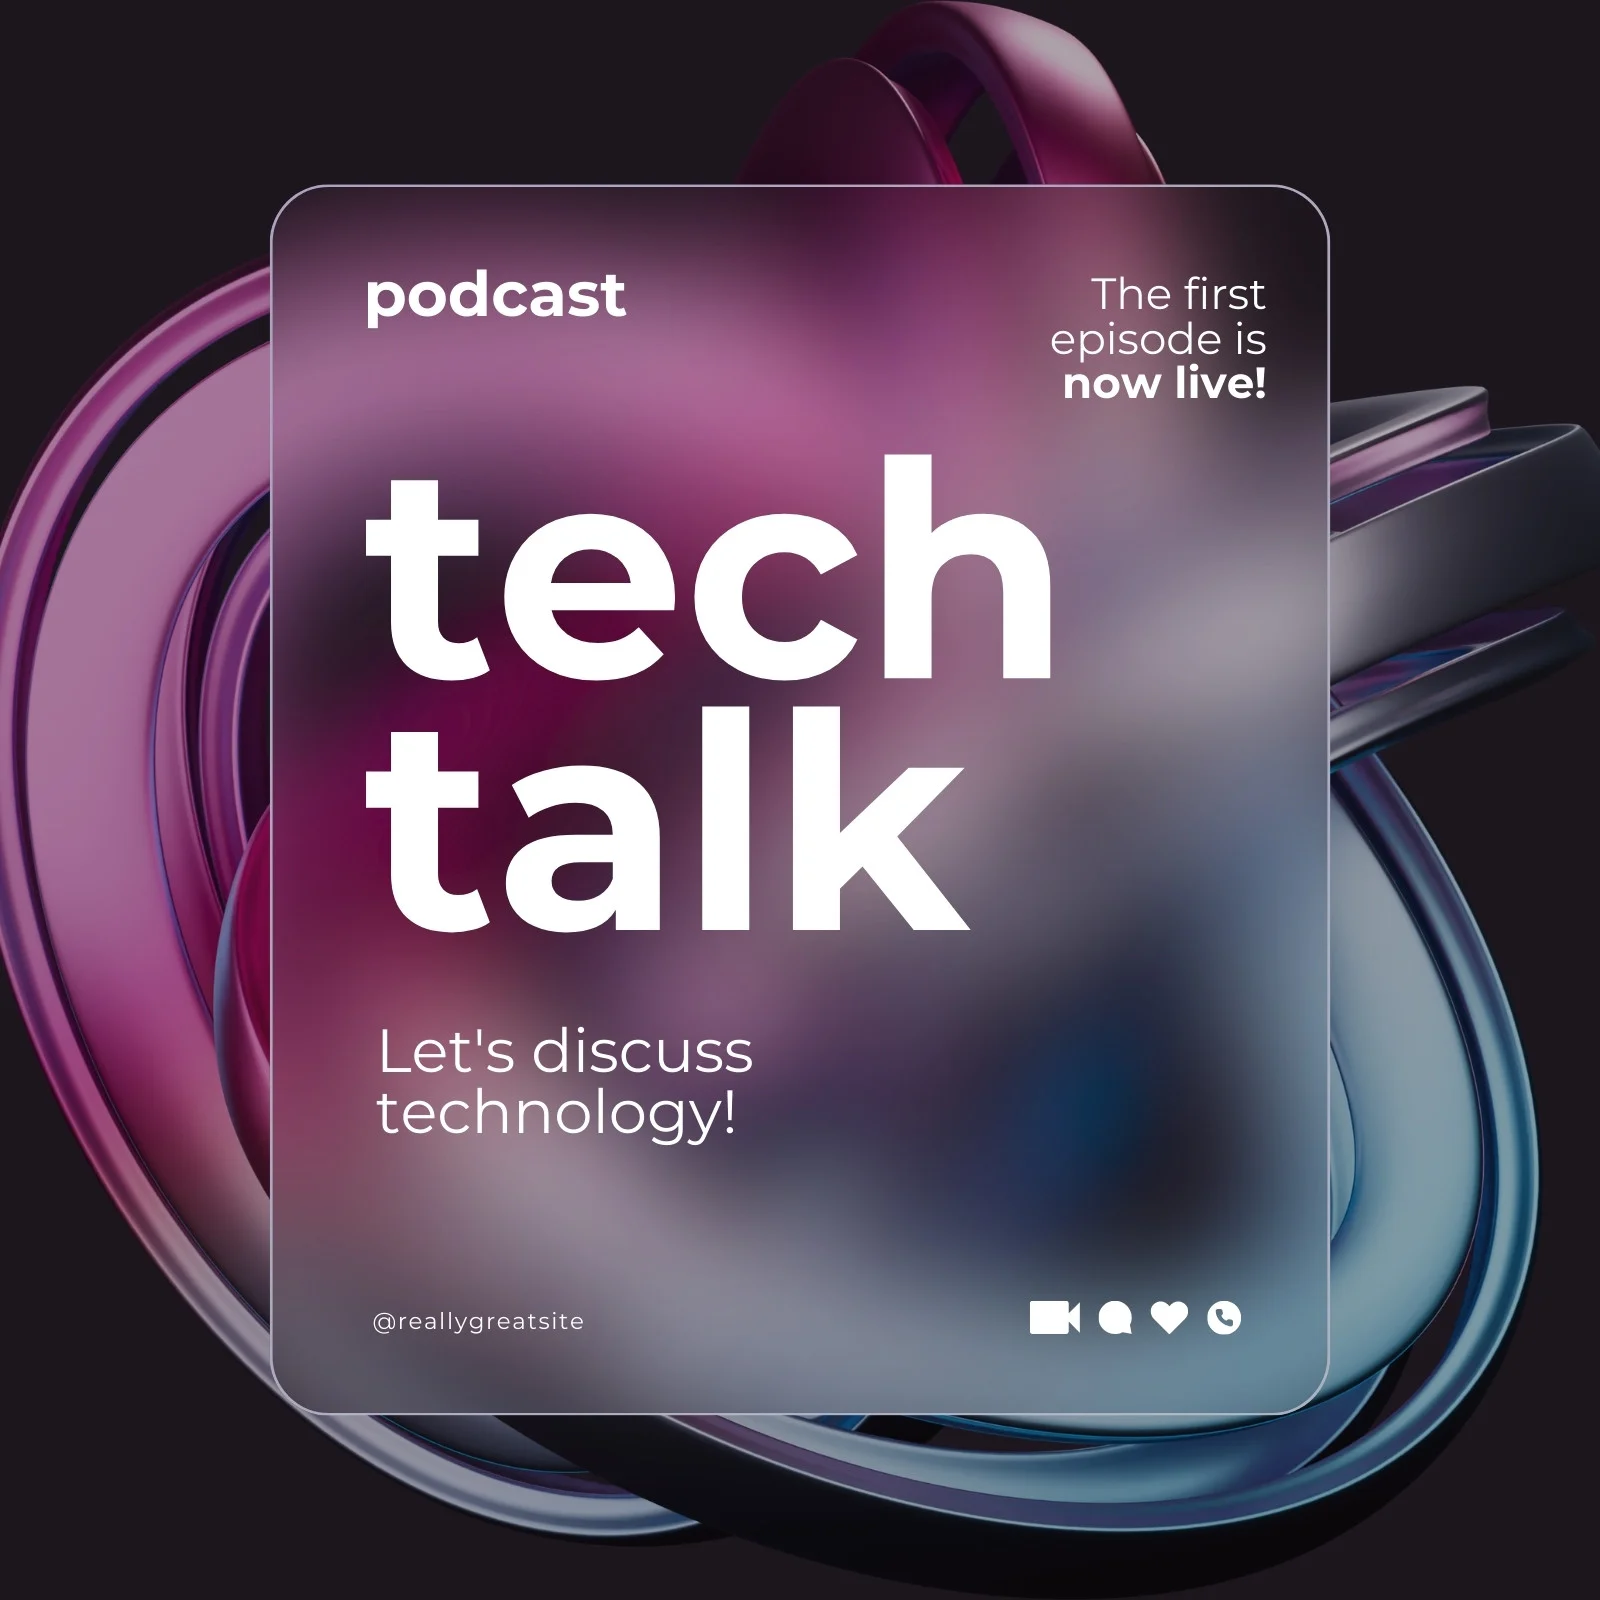

[6/7] Wrote 1600w-1HZYAUid2AE/spec.json


16:24:12 - LiteLLM:DEBUG: litellm_logging.py:1027 - RAW RESPONSE:
{"id": "chatcmpl-CStWNuxJJ4ohJ0glWMtyeatyUKJCl", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "{\n    \"background_color\": \"#000000\",\n    \"has_background_image\": true,\n    \"background_image_description\": \"Abstract colorful swirls in shades of purple and blue\",\n\n    \"nodes\": [\n        {\n            \"type\": \"text\",\n            \"text\": \"podcast\",\n            \"x\": 20,\n            \"y\": 20,\n            \"width\": 100,\n            \"height\": 20,\n            \"font-family\": \"Arial\",\n            \"font-size\": 14,\n            \"color\": \"#FFFFFF\",\n            \"text-align\": \"left\",\n            \"font-weight\": \"normal\",\n            \"font-style\": \"normal\",\n            \"text-decoration\": \"none\",\n            \"text-transform\": \"uppercase\"\n        },\n        {\n            \"type\": \"text\",\n            \"text\": \"tech t

[7/7] Wrote 1600w-zcHQ3XLP3Ow/spec.json
Done.


16:24:12 - LiteLLM:DEBUG: utils.py:4762 - checking potential_model_names in litellm.model_cost: {'split_model': 'gpt-4o-mini-2024-07-18', 'combined_model_name': 'openai/gpt-4o-mini-2024-07-18', 'stripped_model_name': 'gpt-4o-mini-2024-07-18', 'combined_stripped_model_name': 'openai/gpt-4o-mini-2024-07-18', 'custom_llm_provider': 'openai'}
16:24:12 - LiteLLM:DEBUG: utils.py:5091 - model_info: {'key': 'gpt-4o-mini-2024-07-18', 'max_tokens': 16384, 'max_input_tokens': 128000, 'max_output_tokens': 16384, 'input_cost_per_token': 1.5e-07, 'input_cost_per_token_flex': None, 'input_cost_per_token_priority': None, 'cache_creation_input_token_cost': None, 'cache_read_input_token_cost': 7.5e-08, 'cache_read_input_token_cost_flex': None, 'cache_read_input_token_cost_priority': None, 'cache_creation_input_token_cost_above_1hr': None, 'input_cost_per_character': None, 'input_cost_per_token_above_128k_tokens': None, 'input_cost_per_token_above_200k_tokens': None, 'input_cost_per_query': None, 'input_

In [37]:
# Spec generation -> one folder per source file, writing spec.json
OUTPUT_ROOT = Path('../datasets/canva_specs')
OUTPUT_ROOT.mkdir(parents=True, exist_ok=True)
MODEL = os.getenv('OPENAI_MODEL', 'gpt-4o-mini')

DEBUG = False
if DEBUG:
    print((os.getenv("OPENAI_API_KEY", "")[-6:]), (litellm.api_key or "")[-6:])
    litellm._turn_on_debug()

MIME_BY_SUFFIX = {
    '.webp': 'image/webp',
    '.png': 'image/png',
    '.jpg': 'image/jpeg',
    '.jpeg': 'image/jpeg',
}

def _to_data_url(image_path: Path) -> str:
    mime = MIME_BY_SUFFIX.get(image_path.suffix.lower(), 'application/octet-stream')
    b64 = base64.b64encode(image_path.read_bytes()).decode('utf-8')
    return f'data:{mime};base64,{b64}'

_json_block_re = re.compile(r"```(?:json)?\s*([\s\S]*?)```", re.IGNORECASE)

def _parse_json_str(text: str):
    try:
        return json.loads(text)
    except Exception:
        m = _json_block_re.search(text)
        if m:
            try:
                return json.loads(m.group(1))
            except Exception:
                pass
    raise ValueError('Model did not return valid JSON')

instruction = (
    "Return ONLY a strict JSON object matching the schema from the system prompt. "
    "No code fences, no comments, no prose."
)

def describe_image_with_llm(image_path: Path, max_retries: int = 3, cooldown_s: float = 0.5) -> dict:
    data_url = _to_data_url(image_path)
    messages = [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": instruction},
                {"type": "image_url", "image_url": {"url": data_url}},
            ],
        },
    ]
    last_err = None
    for attempt in range(1, max_retries + 1):
        try:
            resp = litellm.completion(model=MODEL, messages=messages, temperature=0.2, max_tokens=1500)
            text = resp["choices"][0]["message"]["content"]
            return _parse_json_str(text)
        except Exception as e:
            last_err = e
            time.sleep(cooldown_s * attempt)
    raise last_err

# Filter to image files
img_df = canva_samples_df[canva_samples_df['path'].astype(str).str.lower().str.endswith(tuple(MIME_BY_SUFFIX.keys()))].copy()
print(f"Found {len(img_df)} image files")

# Generate specs in per-file folders
for i, p in enumerate(img_df['path'], start=1):
    p = Path(p)
    out_dir = (OUTPUT_ROOT / p.stem)
    out_dir.mkdir(parents=True, exist_ok=True)
    spec_path = out_dir / 'spec.json'
    error_path = out_dir / 'error.txt'

    if spec_path.exists():
        if i % 10 == 0:
            print(f"[{i}/{len(img_df)}] Skip existing: {out_dir.name}/spec.json")
        continue

    try:
        spec = describe_image_with_llm(p)
        with spec_path.open('w', encoding='utf-8') as f:
            json.dump(spec, f, ensure_ascii=False, indent=2)
        print(f"[{i}/{len(img_df)}] Wrote {out_dir.name}/spec.json")
    except Exception as e:
        print(f"[{i}/{len(img_df)}] ERROR {p.name}: {e}")
        with error_path.open('w', encoding='utf-8') as f:
            f.write(str(e))
        continue

print('Done.')
